# Network Project:

This notebook is an analysis of all the results generated in `main_attack.ipynb`. The results were saved in the code in a directory `../results/`, consisting of LCC and efficiency values for both batches and sequential attacks and for all the networks on nodes (targeted and communities) and edges. Graphs were also saved in `../graphs/` directory to visualize the attacks. 

## initial setup

### 1. imports and loads

In [1]:
import matplotlib.pyplot as plt
import ast
import pandas as pd
import networkx as nx
import random

colors = ["#94FFB5", "#9DCC00", "#FFA405", "#FF0010", "#5EF1F2", "#00998F", "#740AFF", "#990000", "#426600", "#FFE100", "#FF5005", "#993F00", "#F0A3FF"]


############################################################################
##accessing the values into objects from the csv is following this format:##
############################################################################

# lcc_batch_df = pd.read_csv('../results/lcc_batch_values.csv')
# lcc_batch_df = lcc_batch_df.iloc[:,1:]
# lcc_batch_df.set_index(lcc_batch_df.columns[0], inplace=True)

# for index, row in lcc_batch_df.iterrows():
#     for col in lcc_batch_df.columns:
#         vars()[f"{col}_{index}"] = ast.literal_eval(row[col])
# import matplotlib.pyplot as plt
#############################################################################

arenas_email = nx.read_gml('../benchmark/arenas-email.gml', label='id')
bn_cat_mixed_species_brain_1 = nx.read_gml('../benchmark/bn-cat-mixed-species_brain_1.gml', label='id')
bn_macaque_rhesus_brain_2 = nx.read_gml('../benchmark/bn-macaque-rhesus_brain_2.gml', label='id')
circuits_s208 = nx.read_gml('../benchmark/circuits s208.gml', label='id')
circuits_s420 = nx.read_gml('../benchmark/circuits s420.gml', label='id')
circuits_s838 = nx.read_gml('../benchmark/circuits s838.gml', label='id')
e_coli = nx.read_gml('../benchmark/E. coli.gml', label='id')
facebook_0 = nx.read_gml('../benchmark/facebook 0.gml', label='id')
facebook_107 = nx.read_gml('../benchmark/facebook 107.gml', label='id')
facebook_1684 = nx.read_gml('../benchmark/facebook 1684.gml', label='id')
facebook_348 = nx.read_gml('../benchmark/facebook 348.gml', label='id')
facebook_414 = nx.read_gml('../benchmark/facebook 414.gml', label='id')
facebook_686 = nx.read_gml('../benchmark/facebook 686.gml', label='id')
polbooks = nx.read_gml('../benchmark/polbooks.gml', label='id')
word_adjacencies = nx.read_gml('../benchmark/word_adjacencies.gml', label='id')
corruption=nx.read_gml('../benchmark/corruption.gml', label='id')
crime_net=nx.read_gml('../benchmark/CrimeNet.gml', label='id')
email=nx.read_gml('../benchmark/Email.gml', label='id')
jazz=nx.read_gml('../benchmark/Jazz.gml', label='id')
petster_hamster=nx.read_gml('../benchmark/Petster-Hamster.gml', label='id')

graph_stats= pd.read_csv('../results/stats.csv')
nets = [bn_macaque_rhesus_brain_2, word_adjacencies, circuits_s208, bn_cat_mixed_species_brain_1, facebook_414, facebook_686, polbooks, jazz, facebook_348, circuits_s420, corruption, facebook_0, circuits_s838, crime_net, facebook_1684]
net_names = ["bn_macaque_rhesus_brain_2", "word_adjacencies", "circuits_s208", "bn_cat_mixed_species_brain_1", "facebook_414", "facebook_686", "polbooks", "jazz", "facebook_348", "circuits_s420", "corruption", "facebook_0", "circuits_s838", "crime_net", "facebook_1684"]
graph_stats

,Network,|N|,|V|,Density,<k>,<cc>,<spath>,d
0,bn_macaque_rhesus_brain_2,102,628,0.121918,12.313725,0.000000,1.967191,4
1,word_adjacencies,112,425,0.068372,7.589286,0.172840,2.535553,5
2,circuits_s208,122,189,0.025606,3.098361,0.059094,4.927788,11
3,bn_cat_mixed_species_brain_1,130,1139,0.135838,17.523077,0.000000,2.355277,5
4,facebook_414,150,1693,0.151499,22.573333,0.670292,2.691579,7
5,facebook_686,168,1656,0.118050,19.714286,0.533791,2.425078,6
6,polbooks,190,441,0.024561,4.642105,0.000000,4.574618,10
7,jazz,198,2742,0.140594,27.696970,0.617451,2.235041,6
8,facebook_348,224,3192,0.127803,28.500000,0.544281,2.523463,9
9,circuits_s420,252,399,0.012616,3.166667,0.056085,5.806393,13


### 2. degree distribution

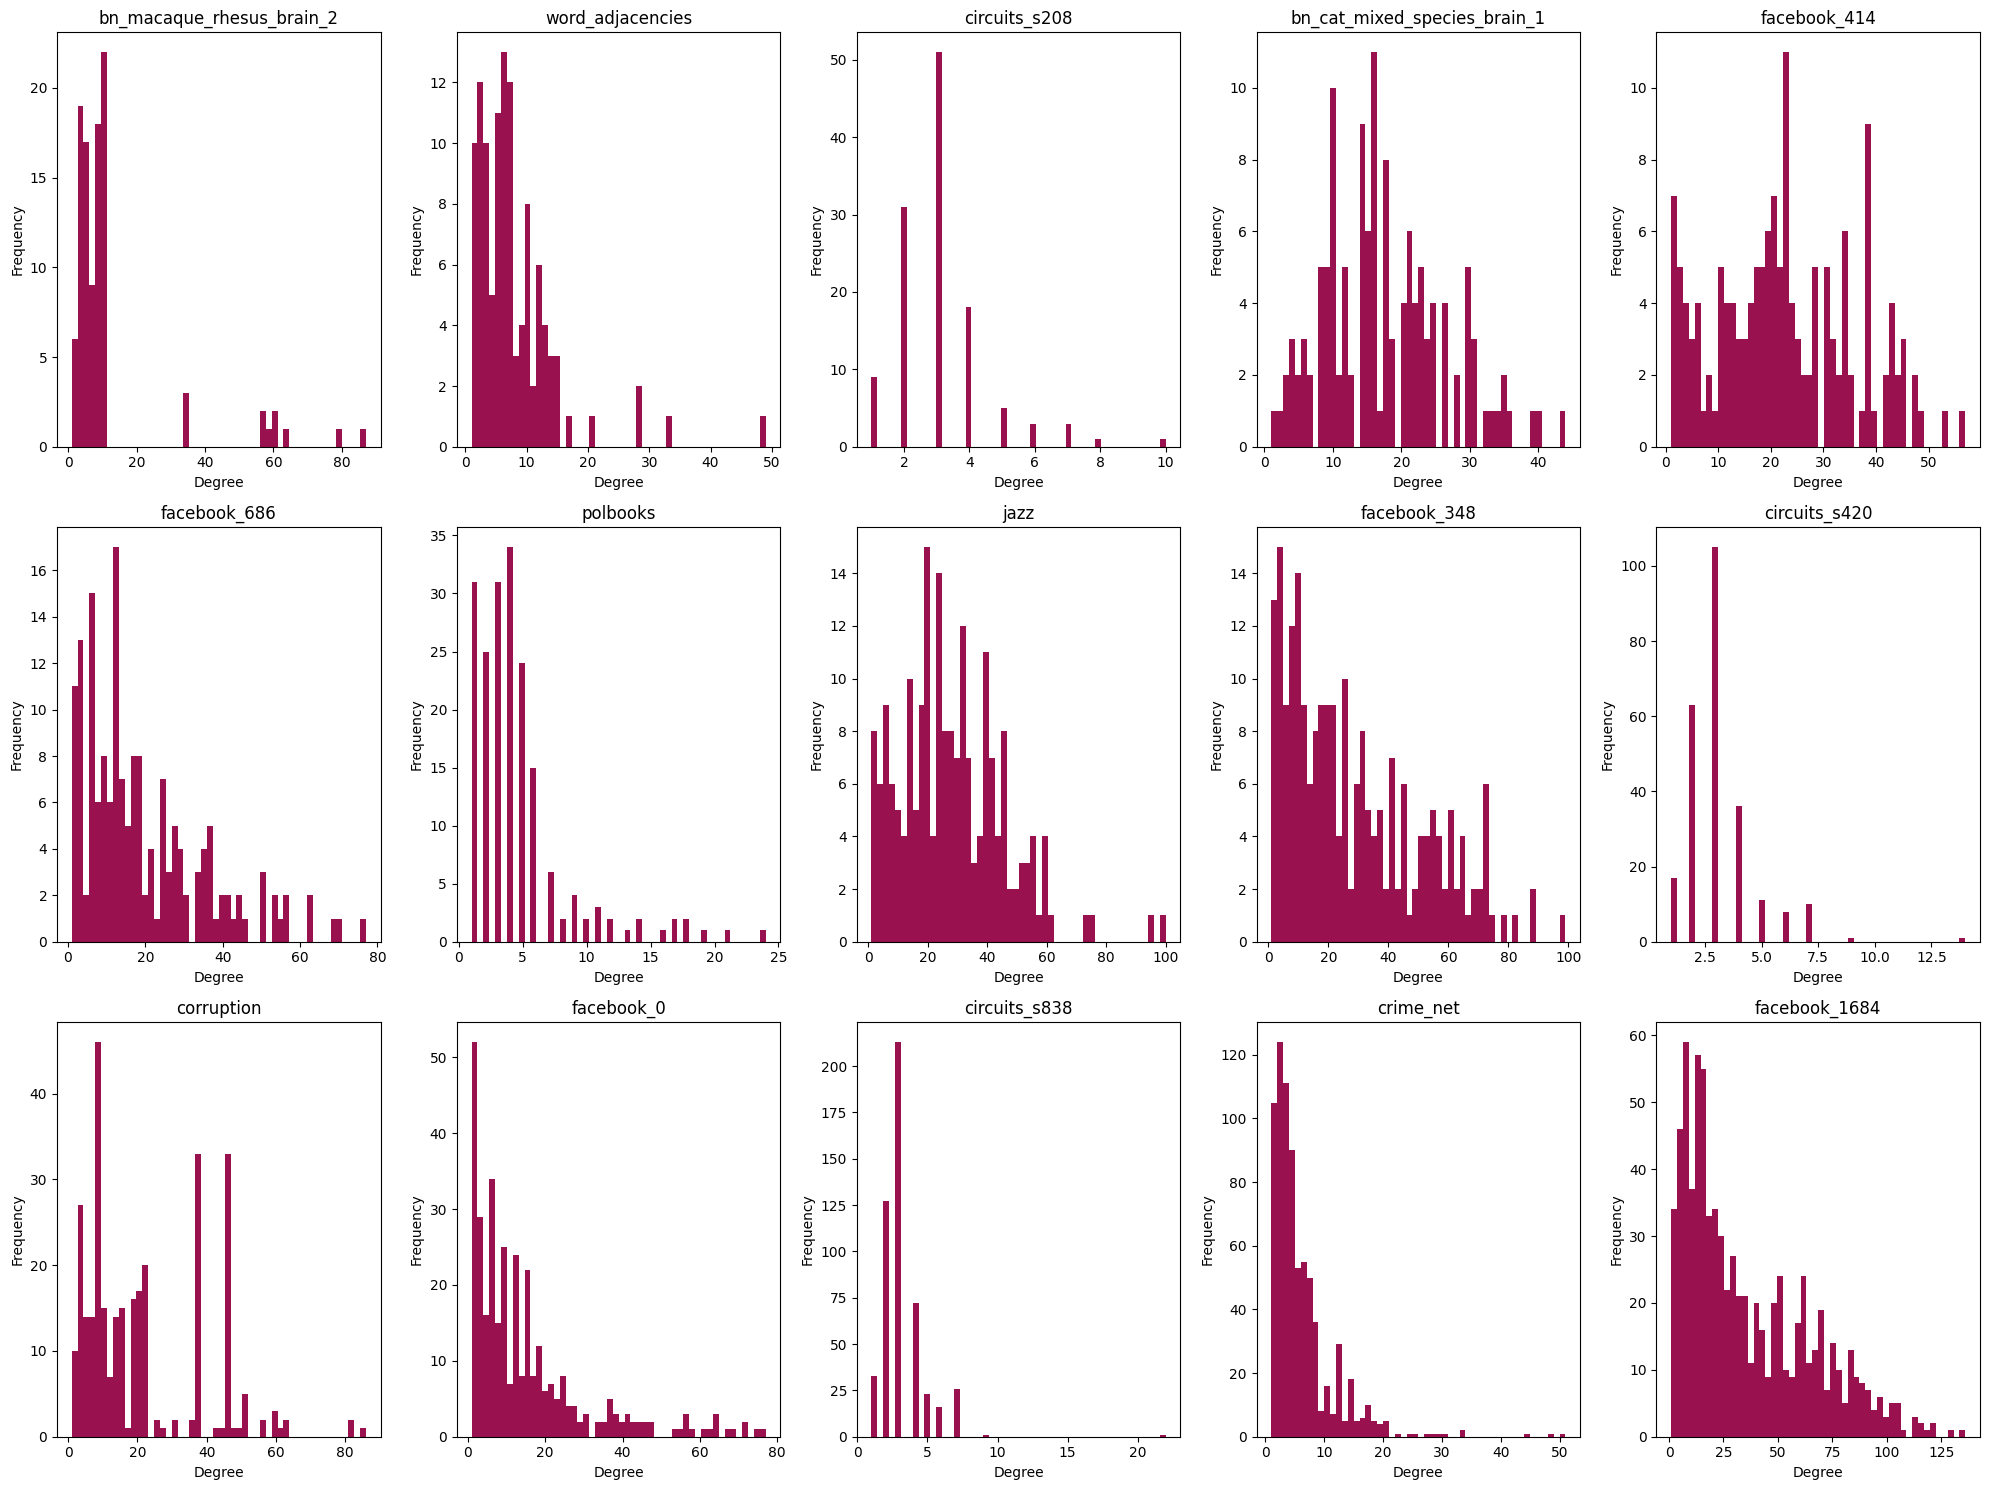

In [2]:
def plot_degree_distributions(graphs, names, axs, color='#9A114F'):
    '''plots the degree distributions of the graphs in a grid'''
    
    for i, (G, name) in enumerate(zip(graphs, names)):
        degrees = [G.degree(n) for n in G.nodes()]
        axs[i].hist(degrees, bins=50, color=color)
        axs[i].set_title(name)
        axs[i].set_xlabel('Degree')
        axs[i].set_ylabel('Frequency')
    
    plt.tight_layout()

fig, axs = plt.subplots(3, 5, figsize=(20, 15))  #always create a 3x5 grid
axs = axs.flatten()

for i in range(3):
    plot_degree_distributions(nets[i*5:i*5+5], graph_stats['Network'][i*5:i*5+5], axs[i*5:i*5+5])

### Processed results: ranks

Here we create csv files of ranks of each of the R and InterE measures based on centralities (check df display down below to see how teh csv file will be)  
This will be an extra table in our paper

In [3]:
#the R results are found at ../results/R_values.csv
R_df = pd.read_csv('../results/R_values.csv').iloc[:,1:]
R_df.set_index(R_df.columns[0], inplace=True)
R_df
#turn each row into a dictionary of key the col name and value the value
dicts = R_df.apply(lambda x: x.to_dict(), axis=1); my_list=[]
for i in dicts:
    i= [x[0] for x in sorted(i.items(), key=lambda x: x[1], reverse=False)]
    #add i to dicts
    my_list.append(i)
    #print the roow name
    # print(R_df.loc(i))
    # display(i)

#make dicts a data frame
sorted_cent = pd.DataFrame(my_list , index=R_df.index)

#make it a csv file in ../processed_results
sorted_cent.to_csv('../processed_results/R_centralities_ranks.csv')

sorted_cent

,0,1,2,3,4,5,6,7,8,9,10,11
network,,,,,,,,,,,,
bn_macaque_rhesus_brain_2,MEC,MED,DC,MEB,BC,NBC,greedy,CC,PR,random,PLCi,DWT
word_adjacencies,MED,MEB,MEC,NBC,BC,DC,CC,PR,greedy,random,PLCi,DWT
circuits_s208,MED,MEB,MEC,DC,NBC,BC,CC,PR,greedy,PLCi,random,DWT
bn_cat_mixed_species_brain_1,MED,MEB,DC,MEC,BC,NBC,CC,PR,greedy,PLCi,random,DWT
facebook_414,NBC,BC,MEB,greedy,PR,CC,DC,MED,MEC,PLCi,random,DWT
facebook_686,BC,NBC,MEB,MED,MEC,DC,CC,PR,greedy,PLCi,random,DWT
polbooks,MED,DC,MEC,MEB,BC,NBC,CC,greedy,random,PLCi,PR,DWT
jazz,BC,NBC,MEB,CC,PR,MED,MEC,DC,greedy,PLCi,random,DWT
facebook_348,NBC,BC,MEB,greedy,CC,PR,MED,MEC,DC,random,PLCi,DWT


In [4]:
#same for InterE
InterE_df = pd.read_csv('../results/InterE_values.csv').iloc[:,1:]
InterE_df.set_index(InterE_df.columns[0], inplace=True)
InterE_df

#turn each row into a dictionary of key the col name and value the value
dicts = InterE_df.apply(lambda x: x.to_dict(), axis=1); my_list=[]
for i in dicts:
    i= [x[0] for x in sorted(i.items(), key=lambda x: x[1], reverse=False)]
    #add i to dicts
    my_list.append(i)
    #print the roow name
    # print(R_df.loc(i))
    # display(i)

#make dicts a data frame
sorted_cent = pd.DataFrame(my_list , index=InterE_df.index)

#make it a csv file in ../processed_results
sorted_cent.to_csv('../processed_results/InterE_centralities_ranks.csv')

sorted_cent

,0,1,2,3,4,5,6,7,8,9,10,11
network,,,,,,,,,,,,
bn_macaque_rhesus_brain_2,MEC,MED,MEB,DC,BC,NBC,greedy,CC,PR,random,PLCi,DWT
word_adjacencies,MED,MEC,MEB,DC,NBC,BC,CC,PR,greedy,PLCi,random,DWT
circuits_s208,MED,MEB,MEC,DC,NBC,BC,PLCi,CC,PR,greedy,random,DWT
bn_cat_mixed_species_brain_1,MEB,MED,NBC,BC,MEC,DC,CC,PR,PLCi,greedy,random,DWT
facebook_414,BC,MEB,NBC,MED,MEC,DC,greedy,PR,CC,random,PLCi,DWT
facebook_686,MEB,BC,NBC,MED,MEC,DC,CC,PR,greedy,random,PLCi,DWT
polbooks,MED,DC,MEB,BC,NBC,MEC,CC,greedy,random,PLCi,PR,DWT
jazz,MEB,BC,NBC,MED,MEC,DC,CC,PR,greedy,random,PLCi,DWT
facebook_348,MEB,NBC,BC,MED,MEC,DC,CC,PR,greedy,random,PLCi,DWT


## LCC plots

### nodes batches plots

In [ ]:
# using the follwoing centralities: 	BC	CC	DC	NBC	PLCi	PR	MEB	MEC	MED	DWT	random	greedy
#functions for network;bn_macaque_rhesus_brain_2;word_adjacencies;circuits_s208;bn_cat_mixed_species_brain_1;facebook_414;facebook_686;polbooks;jazz;facebook_348;circuits_s420;corruption;facebook_0;circuits_s838;crime_net;facebook_1684;

lcc_batch_df = pd.read_csv('../results/lcc_batch_values.csv')
lcc_batch_df = lcc_batch_df.iloc[:,1:]
lcc_batch_df.set_index(lcc_batch_df.columns[0], inplace=True)

def plot_bn_macaque_rhesus_brain_2():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_bn_macaque_rhesus_brain_2, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_bn_macaque_rhesus_brain_2, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_bn_macaque_rhesus_brain_2, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_bn_macaque_rhesus_brain_2, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_bn_macaque_rhesus_brain_2, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_bn_macaque_rhesus_brain_2, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_bn_macaque_rhesus_brain_2, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_bn_macaque_rhesus_brain_2, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_bn_macaque_rhesus_brain_2, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_bn_macaque_rhesus_brain_2, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_bn_macaque_rhesus_brain_2, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_bn_macaque_rhesus_brain_2, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('bn_macaque_rhesus_brain_2 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')   
    #plot.show()()

def plot_word_adjacencies():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_word_adjacencies, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_word_adjacencies, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_word_adjacencies, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_word_adjacencies, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_word_adjacencies, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_word_adjacencies, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_word_adjacencies, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_word_adjacencies, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_word_adjacencies, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_word_adjacencies, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_word_adjacencies, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_word_adjacencies, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('word_adjacencies network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    #plot.show()()

def plot_circuits_s208():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_circuits_s208, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_circuits_s208, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_circuits_s208, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_circuits_s208, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_circuits_s208, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_circuits_s208, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_circuits_s208, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_circuits_s208, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_circuits_s208, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_circuits_s208, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_circuits_s208, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_circuits_s208, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('circuits_s208 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    #plot.show()()

def plot_bn_cat_mixed_species_brain_1():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_bn_cat_mixed_species_brain_1, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_bn_cat_mixed_species_brain_1, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_bn_cat_mixed_species_brain_1, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_bn_cat_mixed_species_brain_1, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_bn_cat_mixed_species_brain_1, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_bn_cat_mixed_species_brain_1, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_bn_cat_mixed_species_brain_1, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_bn_cat_mixed_species_brain_1, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_bn_cat_mixed_species_brain_1, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_bn_cat_mixed_species_brain_1, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_bn_cat_mixed_species_brain_1, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_bn_cat_mixed_species_brain_1, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('bn_cat_mixed_species_brain_1 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    #plot.show()()

def plot_facebook_414():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_facebook_414, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_facebook_414, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_facebook_414, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_facebook_414, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_facebook_414, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_facebook_414, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_facebook_414, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_facebook_414, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_facebook_414, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_facebook_414, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_facebook_414, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_facebook_414, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('facebook_414 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    #plot.show()()

def plot_facebook_686():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_facebook_686, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_facebook_686, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_facebook_686, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_facebook_686, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_facebook_686, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_facebook_686, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_facebook_686, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_facebook_686, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_facebook_686, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_facebook_686, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_facebook_686, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_facebook_686, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('facebook_686 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    #plot.show()()

def plot_polbooks():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_polbooks, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_polbooks, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_polbooks, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_polbooks, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_polbooks, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_polbooks, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_polbooks, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_polbooks, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_polbooks, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_polbooks, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_polbooks, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_polbooks, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('polbooks network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    #plot.show()()

def plot_jazz():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_jazz, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_jazz, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_jazz, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_jazz, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_jazz, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_jazz, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_jazz, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_jazz, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_jazz, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_jazz, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_jazz, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_jazz, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('jazz network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    #plot.show()()

def plot_facebook_348():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_facebook_348, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_facebook_348, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_facebook_348, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_facebook_348, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_facebook_348, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_facebook_348, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_facebook_348, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_facebook_348, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_facebook_348, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_facebook_348, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_facebook_348, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_facebook_348, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('facebook_348 network')
    plt.xlabel('percentage of nodes removed')
    #plot.show()()

def plot_circuits_s420():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_circuits_s420, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_circuits_s420, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_circuits_s420, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_circuits_s420, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_circuits_s420, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_circuits_s420, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_circuits_s420, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_circuits_s420, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_circuits_s420, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_circuits_s420, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_circuits_s420, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_circuits_s420, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('circuits_s420 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    #plot.show()()

def plot_corruption():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_corruption, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_corruption, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_corruption, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_corruption, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_corruption, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_corruption, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_corruption, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_corruption, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_corruption, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_corruption, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_corruption, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_corruption, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('corruption network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    #plot.show()()

def plot_facebook_0():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_facebook_0, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_facebook_0, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_facebook_0, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_facebook_0, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_facebook_0, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_facebook_0, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_facebook_0, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_facebook_0, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_facebook_0, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_facebook_0, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_facebook_0, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_facebook_0, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('facebook_0 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    #plot.show()()

def plot_circuits_s838():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_circuits_s838, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_circuits_s838, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_circuits_s838, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_circuits_s838, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_circuits_s838, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_circuits_s838, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_circuits_s838, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_circuits_s838, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_circuits_s838, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_circuits_s838, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_circuits_s838, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_circuits_s838, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('circuits_s838 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    #plot.show()()

def plot_crime_net():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_crime_net, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_crime_net, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_crime_net, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_crime_net, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_crime_net, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_crime_net, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_crime_net, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_crime_net, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_crime_net, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_crime_net, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_crime_net, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_crime_net, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('crime_net network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    #plot.show()()

def plot_facebook_1684():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_facebook_1684, label='BC', color=colors[0])
    plt.plot(range(0,101), CC_facebook_1684, label='CC', color=colors[1])
    plt.plot(range(0,101), DC_facebook_1684, label='DC', color=colors[2])
    plt.plot(range(0,101), NBC_facebook_1684, label='NBC', color=colors[3])
    plt.plot(range(0,101), PLCi_facebook_1684, label='PLCi', color=colors[4])
    plt.plot(range(0,101), PR_facebook_1684, label='PR', color=colors[5])
    plt.plot(range(0,101), MEB_facebook_1684, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_facebook_1684, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_facebook_1684, label='MED', color=colors[8])
    plt.plot(range(0,101), DWT_facebook_1684, label='DWT', color=colors[9])
    plt.plot(range(0,101), random_facebook_1684, label='random', color=colors[10])
    plt.plot(range(0,101), greedy_facebook_1684, label='greedy', color=colors[11])
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('facebook_1684 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    #plot.show()()


functions=[plot_bn_macaque_rhesus_brain_2,plot_word_adjacencies,plot_circuits_s208,plot_bn_cat_mixed_species_brain_1,plot_facebook_414,plot_facebook_686,plot_polbooks,plot_jazz,plot_facebook_348,plot_circuits_s420,plot_corruption,plot_facebook_0,plot_circuits_s838,plot_crime_net,plot_facebook_1684]

fig, axs = plt.subplots(5,3, figsize=(20, 30))

for i in range(5):
    for j in range(3):
        plt.sca(axs[i, j])  
        functions[i*3 + j]()  

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5, fontsize='large')
plt.tight_layout() 
plt.show()

### edges batches plot

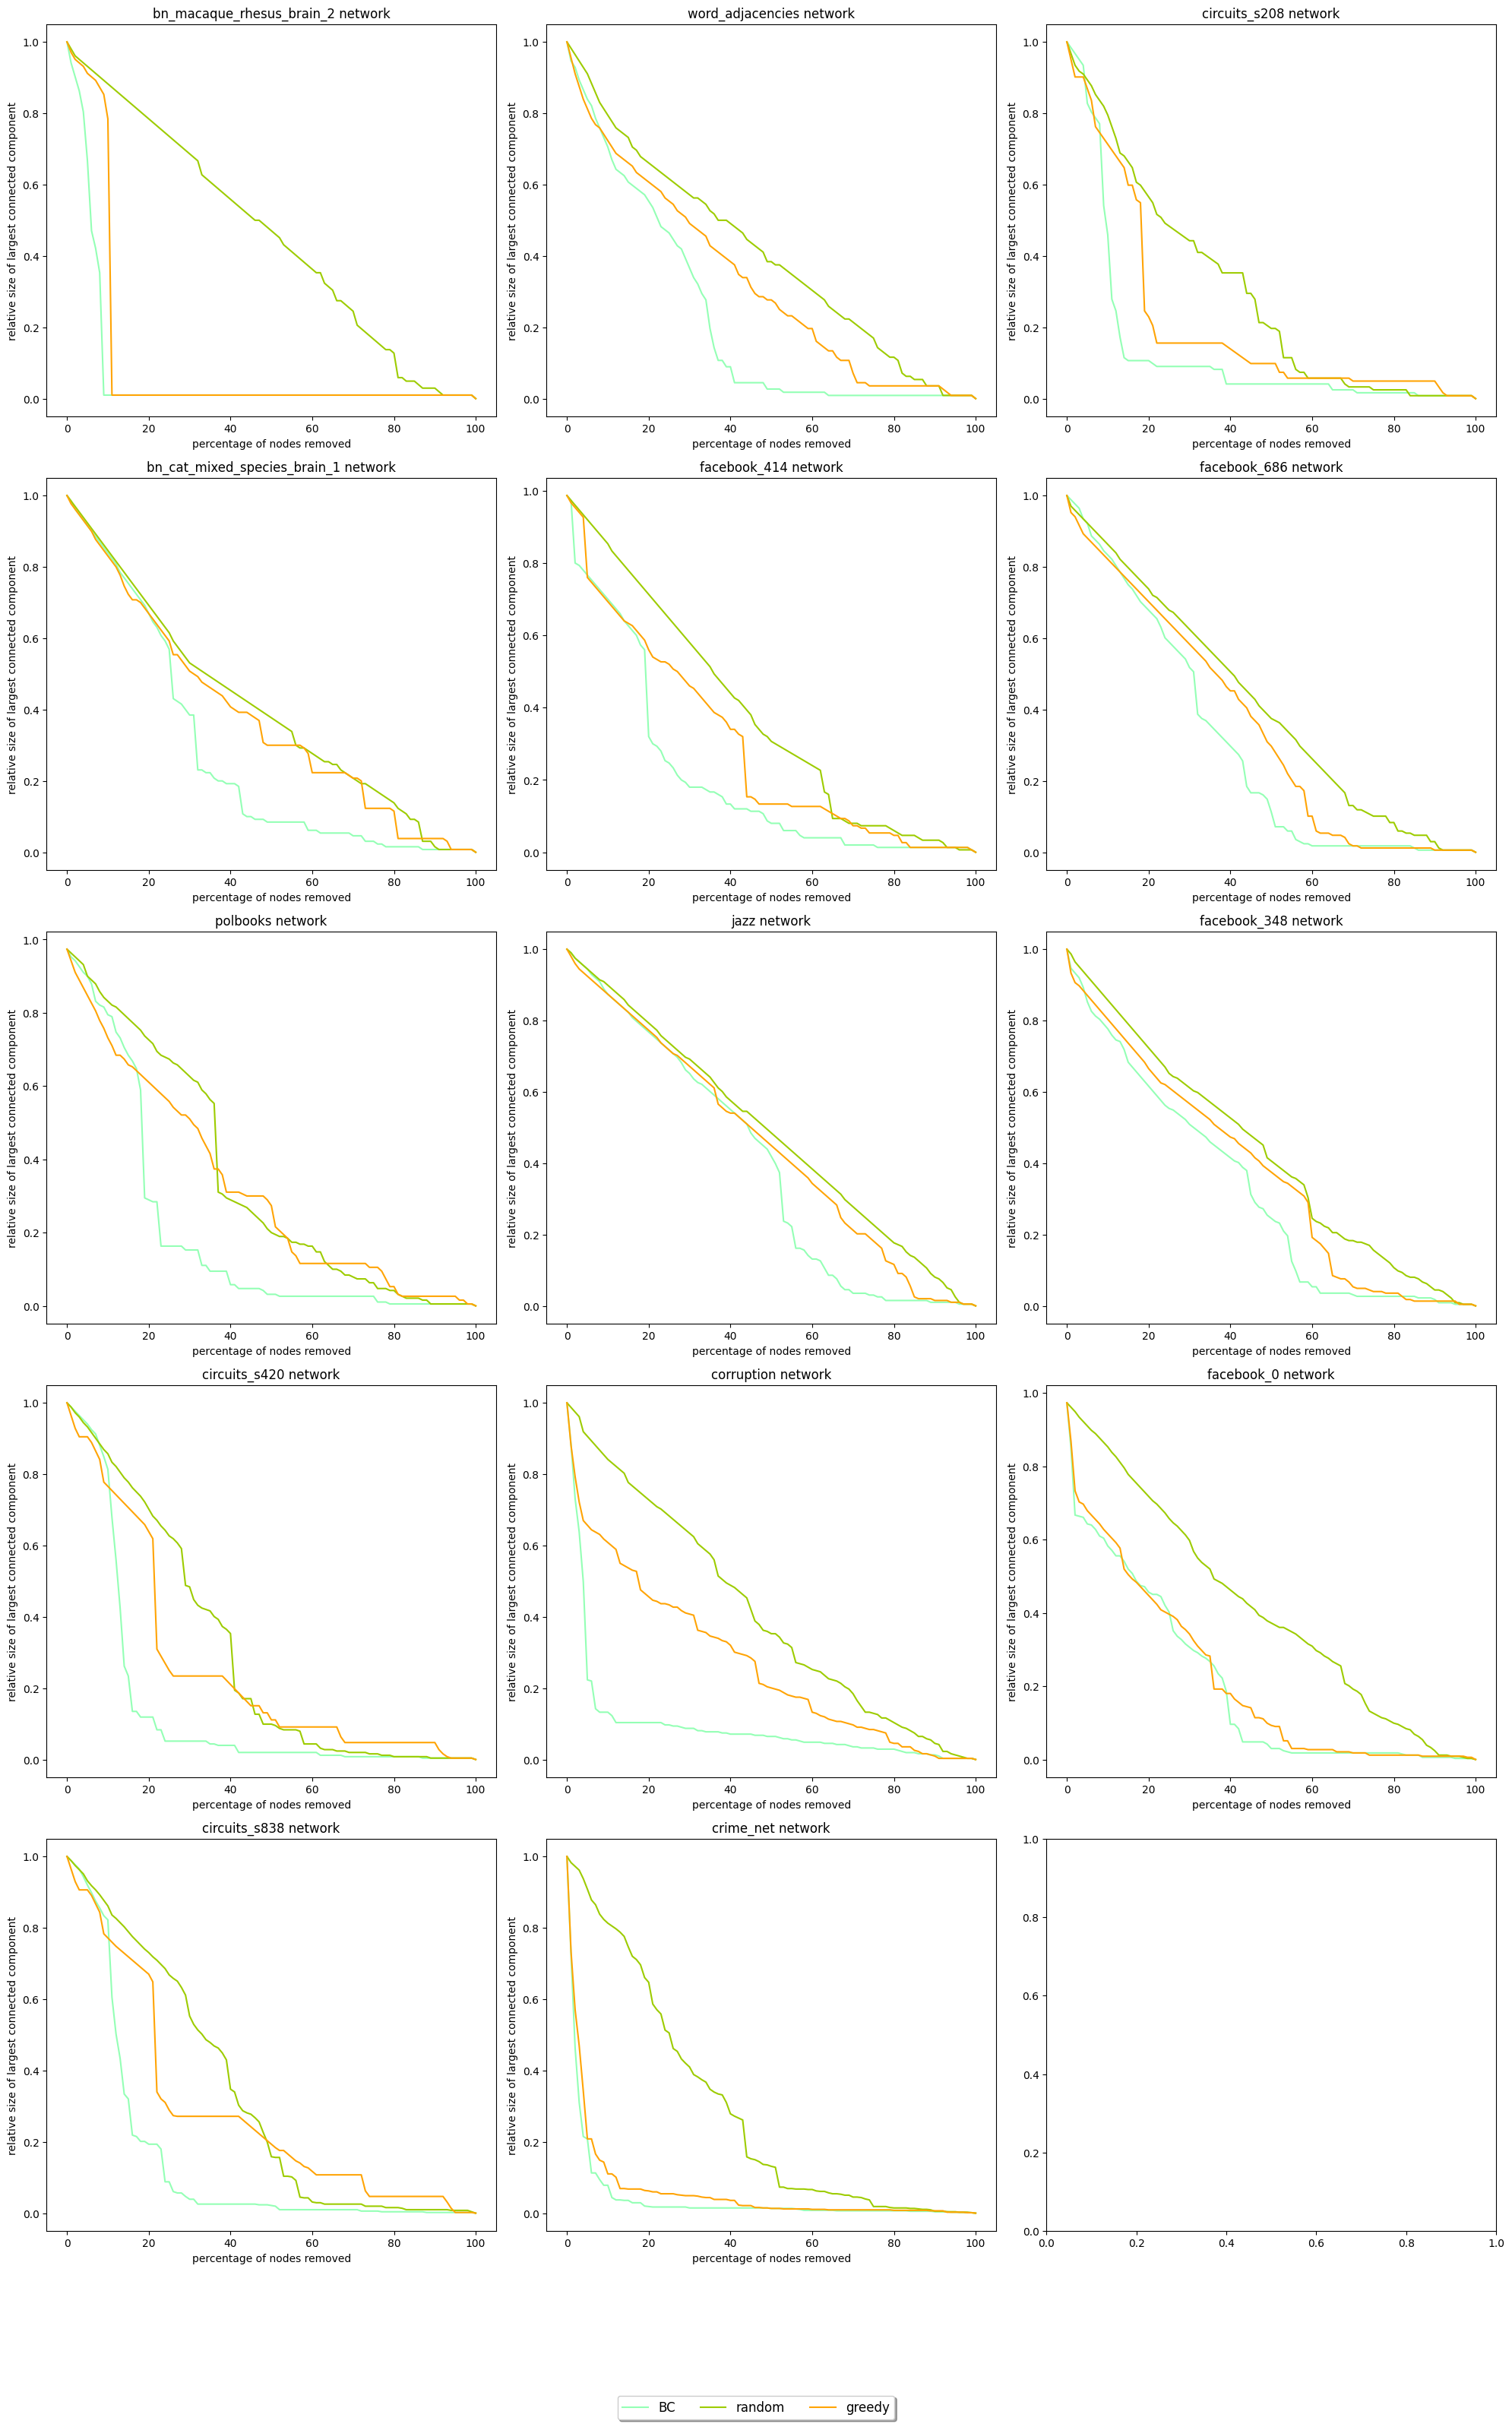

In [ ]:
lcc_batch_df = pd.read_csv('../results/lcc_batch_values.csv')
lcc_batch_df = lcc_batch_df.iloc[:,1:]
lcc_batch_df.set_index(lcc_batch_df.columns[0], inplace=True)

for index, row in lcc_batch_df.iterrows():
    for col in lcc_batch_df.columns:
        vars()[f"{col}_{index}"] = ast.literal_eval(row[col])

y='relative size of largest connected component'

def plot_bn_macaque_rhesus_brain_2():
    plt.plot(range(0,101), BC_bn_macaque_rhesus_brain_2, label='BC', color=colors[0])
    plt.plot(range(0,101), random_bn_macaque_rhesus_brain_2, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_bn_macaque_rhesus_brain_2, label='greedy', color=colors[2])
    plt.title('bn_macaque_rhesus_brain_2 network')
    plt.xlabel('percentage of nodes removed')   
    plt.ylabel(y)

def plot_word_adjacencies():
    plt.plot(range(0,101), BC_word_adjacencies, label='BC', color=colors[0])
    plt.plot(range(0,101), random_word_adjacencies, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_word_adjacencies, label='greedy', color=colors[2])
    plt.title('word_adjacencies network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel(y)

def plot_circuits_s208():
    plt.plot(range(0,101), BC_circuits_s208, label='BC', color=colors[0])
    plt.plot(range(0,101), random_circuits_s208, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_circuits_s208, label='greedy', color=colors[2])
    plt.title('circuits_s208 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel(y)

def plot_bn_cat_mixed_species_brain_1():
    plt.plot(range(0,101), BC_bn_cat_mixed_species_brain_1, label='BC', color=colors[0])
    plt.plot(range(0,101), random_bn_cat_mixed_species_brain_1, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_bn_cat_mixed_species_brain_1, label='greedy', color=colors[2])
    plt.title('bn_cat_mixed_species_brain_1 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel(y)

def plot_facebook_414():
    plt.plot(range(0,101), BC_facebook_414, label='BC', color=colors[0])
    plt.plot(range(0,101), random_facebook_414, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_facebook_414, label='greedy', color=colors[2])
    plt.title('facebook_414 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel(y)


def plot_facebook_686():
    plt.plot(range(0,101), BC_facebook_686, label='BC', color=colors[0])
    plt.plot(range(0,101), random_facebook_686, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_facebook_686, label='greedy', color=colors[2])
    plt.title('facebook_686 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel(y)

def plot_polbooks():
    plt.plot(range(0,101), BC_polbooks, label='BC', color=colors[0])
    plt.plot(range(0,101), random_polbooks, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_polbooks, label='greedy', color=colors[2])
    plt.title('polbooks network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel(y)

def plot_jazz():
    plt.plot(range(0,101), BC_jazz, label='BC', color=colors[0])
    plt.plot(range(0,101), random_jazz, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_jazz, label='greedy', color=colors[2])
    plt.title('jazz network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel(y)

def plot_facebook_348():
    plt.plot(range(0,101), BC_facebook_348, label='BC', color=colors[0])
    plt.plot(range(0,101), random_facebook_348, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_facebook_348, label='greedy', color=colors[2])
    plt.title('facebook_348 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel(y)

def plot_circuits_s420():   
    plt.plot(range(0,101), BC_circuits_s420, label='BC', color=colors[0])
    plt.plot(range(0,101), random_circuits_s420, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_circuits_s420, label='greedy', color=colors[2])
    plt.title('circuits_s420 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel(y)

def plot_corruption():
    plt.plot(range(0,101), BC_corruption, label='BC', color=colors[0])
    plt.plot(range(0,101), random_corruption, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_corruption, label='greedy', color=colors[2])
    plt.title('corruption network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel(y)

def plot_facebook_0():
    plt.plot(range(0,101), BC_facebook_0, label='BC', color=colors[0])
    plt.plot(range(0,101), random_facebook_0, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_facebook_0, label='greedy', color=colors[2])
    plt.title('facebook_0 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel(y)

def plot_circuits_s838():   
    plt.plot(range(0,101), BC_circuits_s838, label='BC', color=colors[0])
    plt.plot(range(0,101), random_circuits_s838, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_circuits_s838, label='greedy', color=colors[2])
    plt.title('circuits_s838 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel(y)

def plot_crime_net():
    plt.plot(range(0,101), BC_crime_net, label='BC', color=colors[0])
    plt.plot(range(0,101), random_crime_net, label='random', color=colors[1])
    plt.plot(range(0,101), greedy_crime_net, label='greedy', color=colors[2])
    plt.title('crime_net network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel(y)

functions=[plot_bn_macaque_rhesus_brain_2,plot_word_adjacencies,plot_circuits_s208,plot_bn_cat_mixed_species_brain_1,plot_facebook_414,plot_facebook_686,plot_polbooks,plot_jazz,plot_facebook_348,plot_circuits_s420,plot_corruption,plot_facebook_0,plot_circuits_s838,plot_crime_net]

fig, axs = plt.subplots(5,3, figsize=(20, 30))

for i in range(5):
    for j in range(3):
        if i == 4 and j == 2:  # Skip the last plot
            continue
        plt.sca(axs[i, j])  
        functions[i*3 + j]()

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5, fontsize='large')
plt.tight_layout()
plt.show()




### batches community nodes

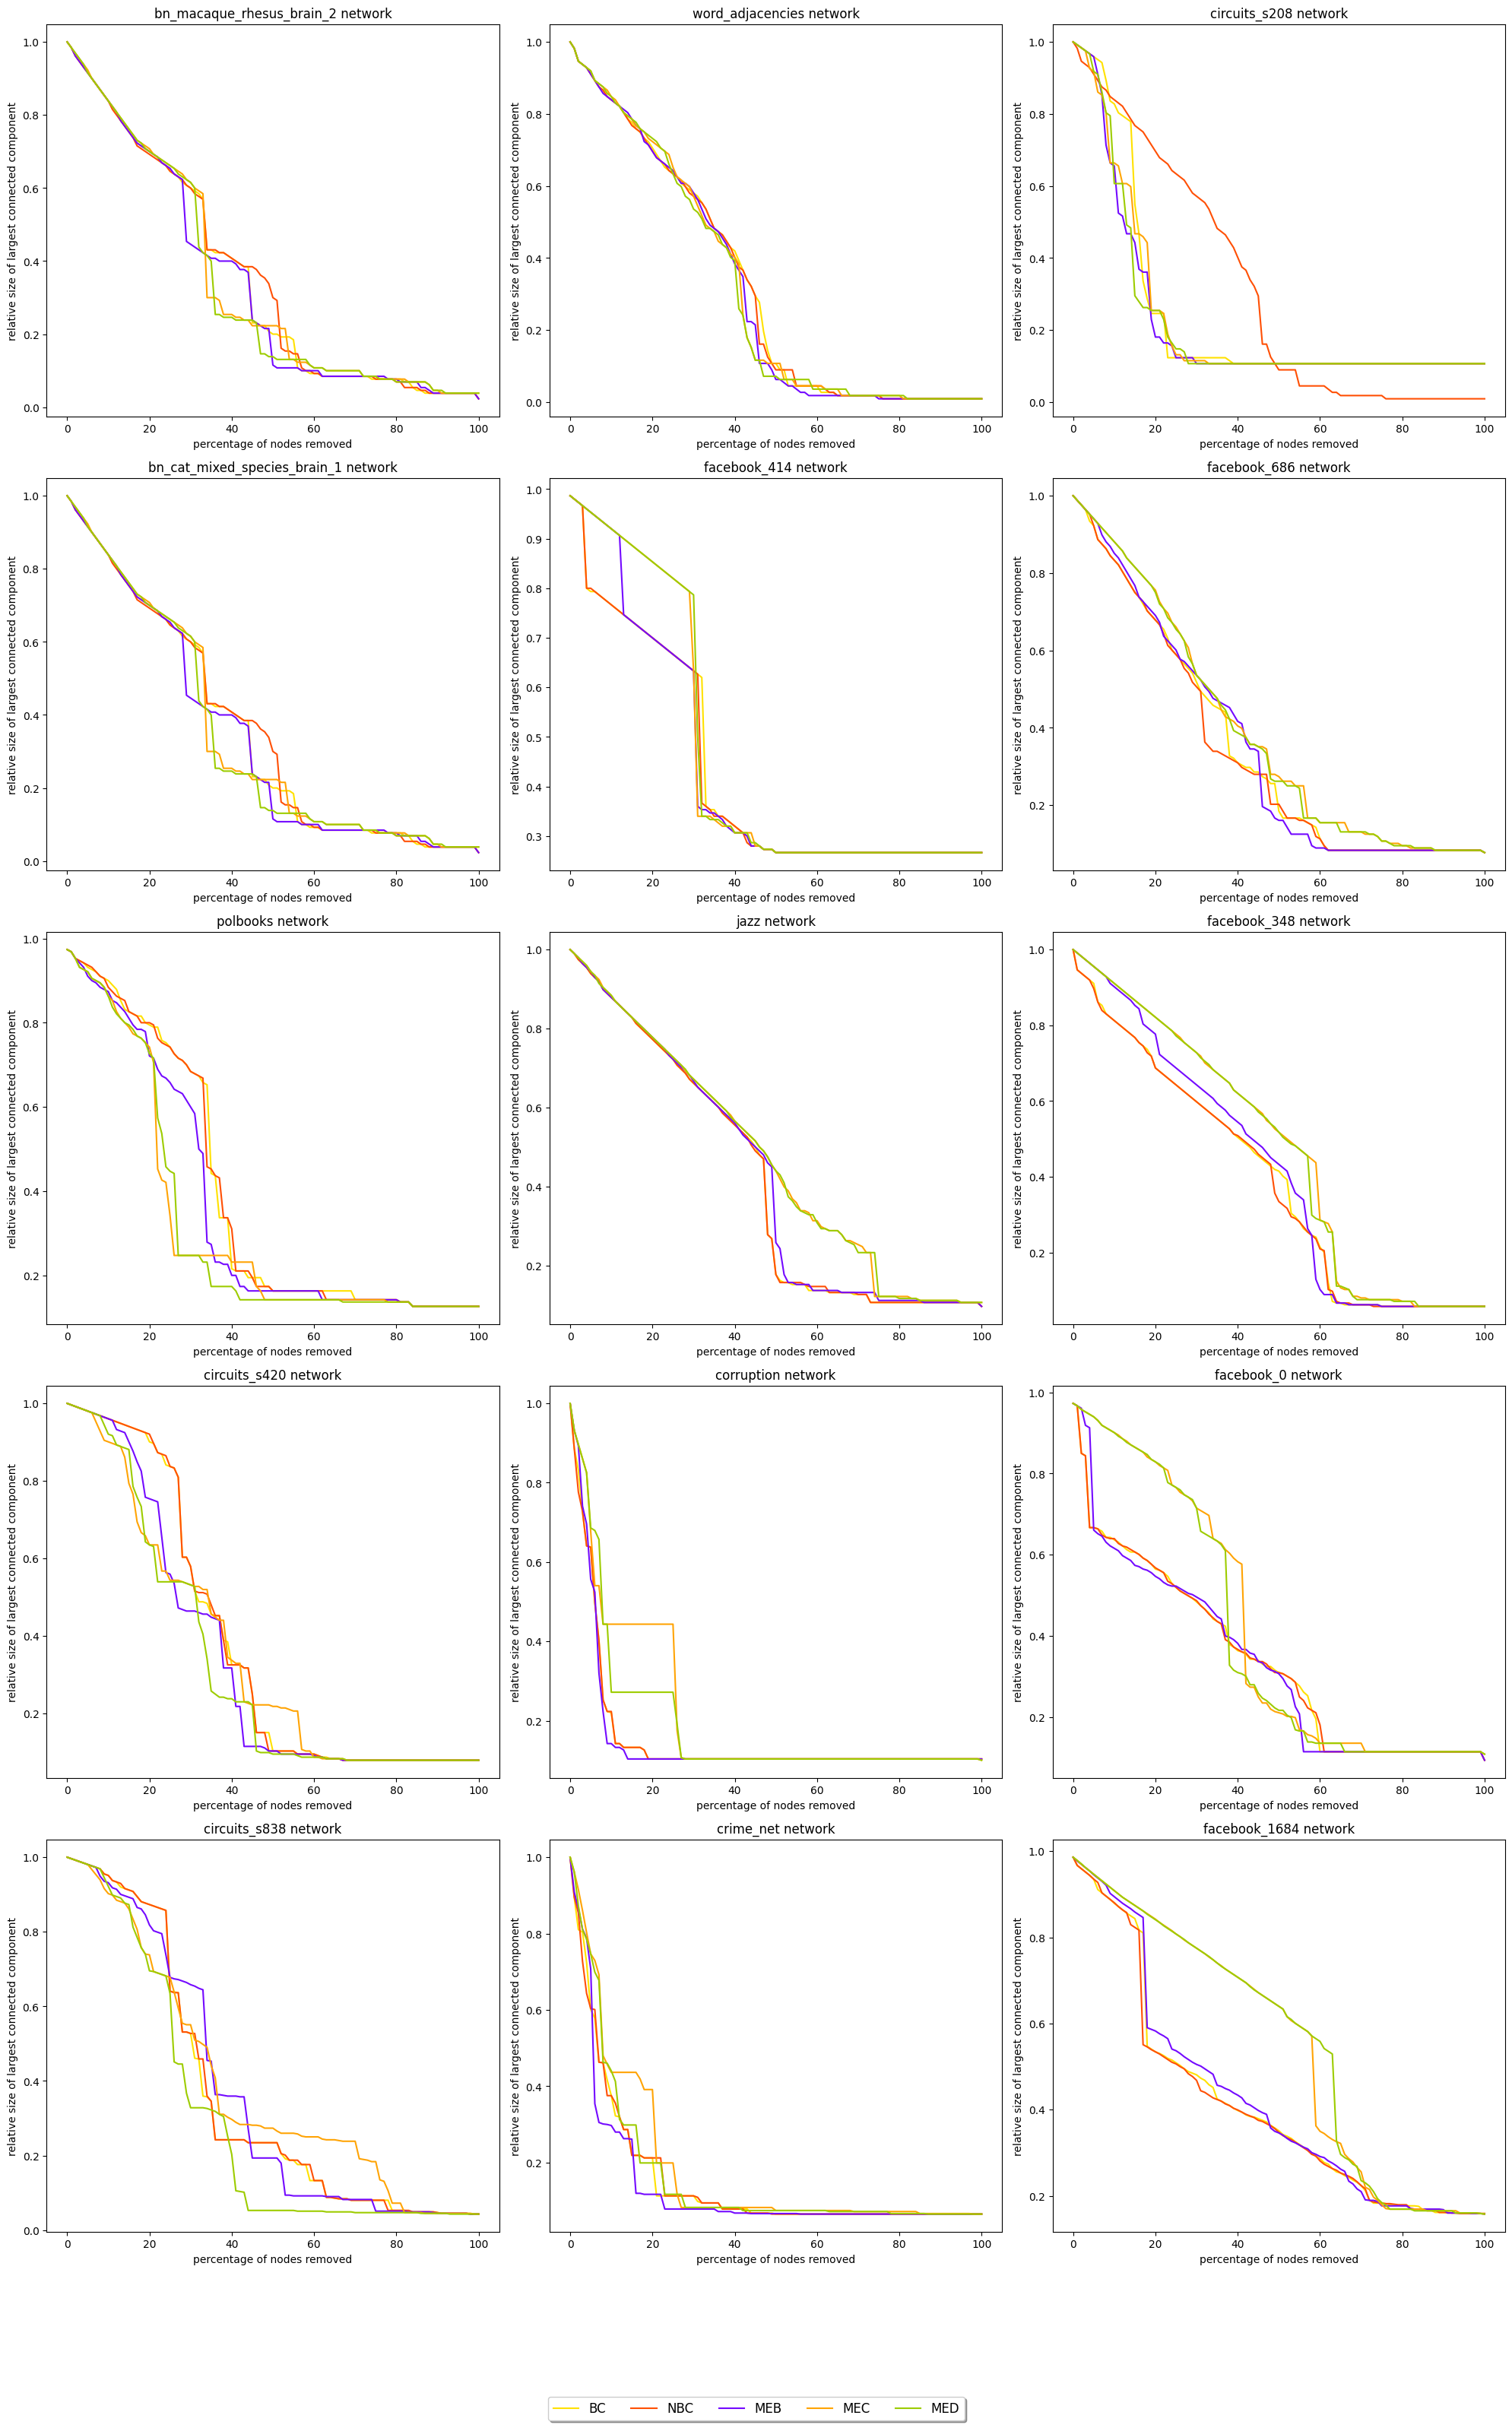

In [ ]:
# using the follwoing centralities: 	BC	CC	DC	NBC	PLCi	PR	MEB	MEC	MED	DWT	random	greedy
#functions for network;bn_macaque_rhesus_brain_2;word_adjacencies;circuits_s208;bn_cat_mixed_species_brain_1;facebook_414;facebook_686;polbooks;jazz;facebook_348;circuits_s420;corruption;facebook_0;circuits_s838;crime_net;facebook_1684;
#shuffle the color list


lcc_batch_df = pd.read_csv('../results/lcc_com_batch_values.csv')
lcc_batch_df = lcc_batch_df.iloc[:,1:]
lcc_batch_df.set_index(lcc_batch_df.columns[0], inplace=True)

for index, row in lcc_batch_df.iterrows():
    for col in lcc_batch_df.columns:
        vars()[f"{col}_{index}"] = ast.literal_eval(row[col])


def plot_bn_macaque_rhesus_brain_2():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_bn_macaque_rhesus_brain_2, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_bn_macaque_rhesus_brain_2, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_bn_macaque_rhesus_brain_2, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_bn_macaque_rhesus_brain_2, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_bn_macaque_rhesus_brain_2, label='MED', color=colors[8])

    plt.title('bn_macaque_rhesus_brain_2 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')   
    #plot.show()()

def plot_word_adjacencies():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_word_adjacencies, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_word_adjacencies, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_word_adjacencies, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_word_adjacencies, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_word_adjacencies, label='MED', color=colors[8])

    plt.title('word_adjacencies network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')

def plot_circuits_s208():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_circuits_s208, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_word_adjacencies, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_circuits_s208, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_circuits_s208, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_circuits_s208, label='MED', color=colors[8])

    plt.title('circuits_s208 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')

def plot_bn_cat_mixed_species_brain_1():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_bn_cat_mixed_species_brain_1, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_bn_cat_mixed_species_brain_1, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_bn_cat_mixed_species_brain_1, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_bn_cat_mixed_species_brain_1, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_bn_cat_mixed_species_brain_1, label='MED', color=colors[8])

    plt.title('bn_cat_mixed_species_brain_1 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')

def plot_facebook_414():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_facebook_414, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_facebook_414, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_facebook_414, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_facebook_414, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_facebook_414, label='MED', color=colors[8])

    plt.title('facebook_414 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')

def plot_facebook_686():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_facebook_686, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_facebook_686, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_facebook_686, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_facebook_686, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_facebook_686, label='MED', color=colors[8])

    plt.title('facebook_686 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')

def plot_polbooks():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_polbooks, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_polbooks, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_polbooks, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_polbooks, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_polbooks, label='MED', color=colors[8])

    plt.title('polbooks network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')

def plot_jazz():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_jazz, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_jazz, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_jazz, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_jazz, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_jazz, label='MED', color=colors[8])

    plt.title('jazz network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')


def plot_facebook_348():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_facebook_348, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_facebook_348, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_facebook_348, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_facebook_348, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_facebook_348, label='MED', color=colors[8])

    plt.title('facebook_348 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')

def plot_circuits_s420():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_circuits_s420, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_circuits_s420, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_circuits_s420, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_circuits_s420, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_circuits_s420, label='MED', color=colors[8])

    plt.title('circuits_s420 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')

def plot_corruption():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_corruption, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_corruption, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_corruption, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_corruption, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_corruption, label='MED', color=colors[8])

    plt.title('corruption network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')

def plot_facebook_0():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_facebook_0, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_facebook_0, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_facebook_0, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_facebook_0, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_facebook_0, label='MED', color=colors[8])

    plt.title('facebook_0 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')


def plot_circuits_s838():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_circuits_s838, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_circuits_s838, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_circuits_s838, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_circuits_s838, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_circuits_s838, label='MED', color=colors[8])

    plt.title('circuits_s838 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')

def plot_crime_net():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_crime_net, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_crime_net, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_crime_net, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_crime_net, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_crime_net, label='MED', color=colors[8])

    plt.title('crime_net network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')


def plot_facebook_1684():
    #make the x axis 0,1,....100
    plt.plot(range(0,101), BC_facebook_1684, label='BC', color=colors[0])
    plt.plot(range(0,101), NBC_facebook_1684, label='NBC', color=colors[3])
    plt.plot(range(0,101), MEB_facebook_1684, label='MEB', color=colors[6])
    plt.plot(range(0,101), MEC_facebook_1684, label='MEC', color=colors[7])
    plt.plot(range(0,101), MED_facebook_1684, label='MED', color=colors[8])

    plt.title('facebook_1684 network')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')


functions=[plot_bn_macaque_rhesus_brain_2,plot_word_adjacencies,plot_circuits_s208,plot_bn_cat_mixed_species_brain_1,plot_facebook_414,plot_facebook_686,plot_polbooks,plot_jazz,plot_facebook_348,plot_circuits_s420,plot_corruption,plot_facebook_0,plot_circuits_s838,plot_crime_net,plot_facebook_1684]

fig, axs = plt.subplots(5,3, figsize=(20, 30))

for i in range(5):
    for j in range(3):
        plt.sca(axs[i, j])  
        functions[i*3 + j]()  

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5, fontsize='large')
plt.tight_layout() 
plt.show()

### batches community vs targeted 1v1

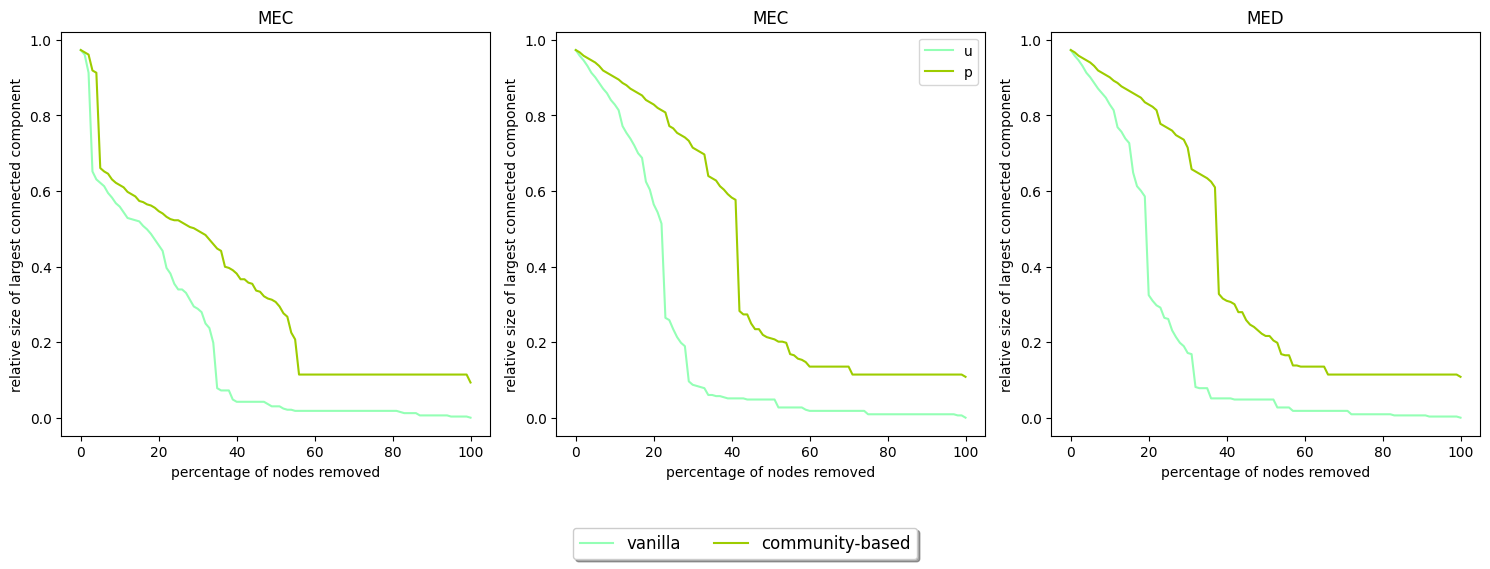

In [ ]:
lcc_com_seq_df = pd.read_csv('../results/lcc_com_batch_values.csv')
lcc_com_seq_df = lcc_com_seq_df.iloc[:,1:]
lcc_com_seq_df.set_index(lcc_com_seq_df.columns[0], inplace=True)

for index, row in lcc_com_seq_df.iterrows():
    for col in lcc_com_seq_df.columns:
        vars()[f"com_{col}_{index}"] = ast.literal_eval(row[col])

lcc_seq_df = pd.read_csv('../results/lcc_batch_values.csv')
lcc_seq_df = lcc_seq_df.iloc[:,1:]
lcc_seq_df.set_index(lcc_seq_df.columns[0], inplace=True)

for index, row in lcc_seq_df.iterrows():
    for col in lcc_seq_df.columns:
        vars()[f"tar_{col}_{index}"] = ast.literal_eval(row[col])

def plot_BC():
    plt.plot(range(101), tar_BC_facebook_0, label='vanilla', color=colors[0])
    plt.plot(range(101), com_BC_facebook_0, label='community-based', color=colors[1])

    plt.title('BC')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')


def plot_NBC():
    plt.plot(range(101), tar_NBC_facebook_0, label='vanilla', color=colors[0])
    plt.plot(range(101), com_NBC_facebook_0, label='community-based', color=colors[1])

    plt.title('NBC')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')

def plot_MEB():
    plt.plot(range(101), tar_MEB_facebook_0, label='vanilla', color=colors[0])
    plt.plot(range(101), com_MEB_facebook_0, label='community-based', color=colors[1])

    plt.title('MEC')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')

def plot_MEC():
    plt.plot(range(101), tar_MEC_facebook_0, label='vanilla', color=colors[0])
    plt.plot(range(101), com_MEC_facebook_0, label='community-based', color=colors[1])

    plt.title('MEC')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    plt.legend('upper right')


def plot_MED():
    plt.plot(range(101), tar_MED_facebook_0, label='vanilla', color=colors[0])
    plt.plot(range(101), com_MED_facebook_0, label='community-based', color=colors[1])

    plt.title('MED')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('relative size of largest connected component')
    # plt.legend('upper right')

functions=[plot_MEB, plot_MEC, plot_MED]
fig, axs = plt.subplots(1,3, figsize=(15,5))

for j in range(3):
    plt.sca(axs[j])  
    functions[j]()  

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5, fontsize='large')
plt.tight_layout() 
plt.show()

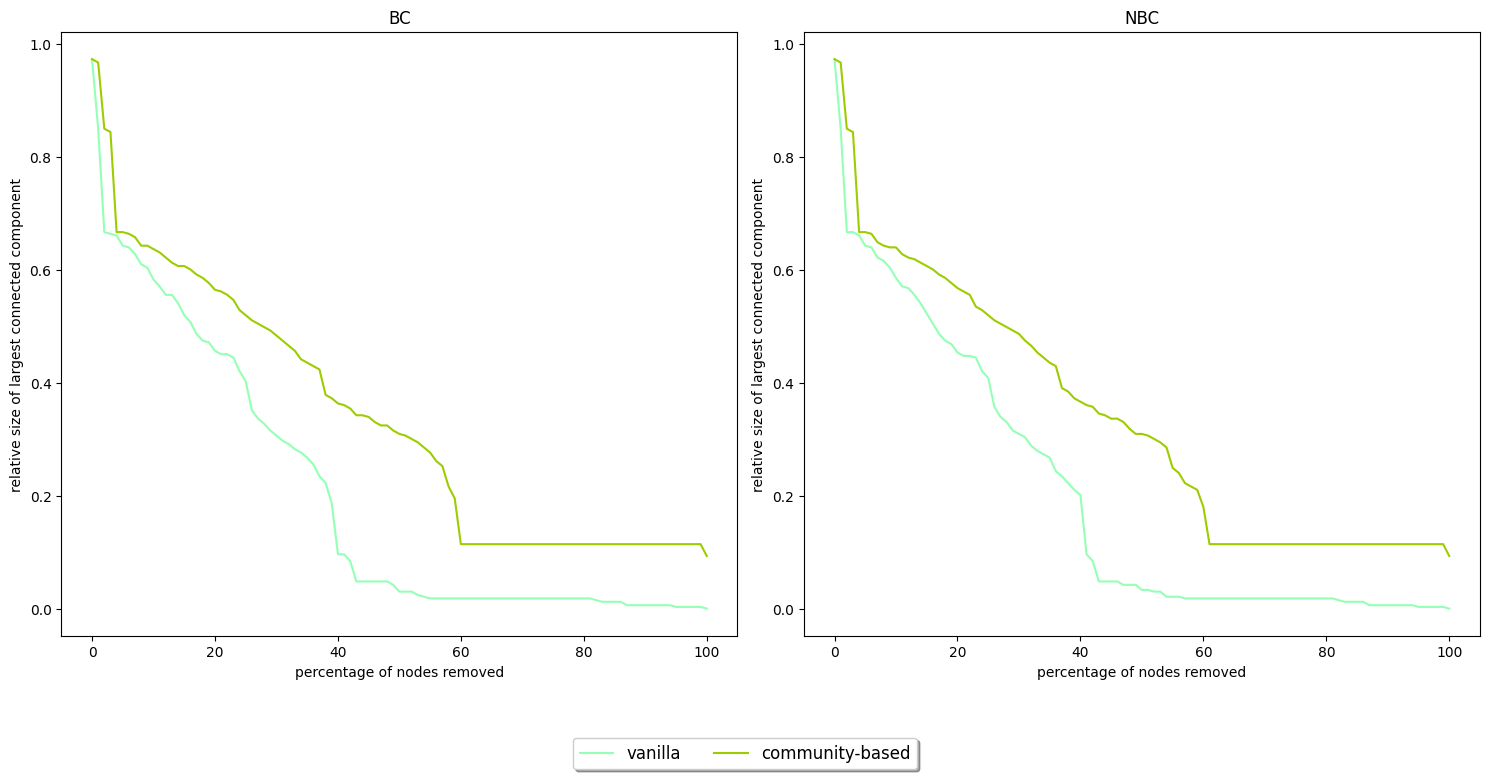

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.sca(axs[0])  
plot_BC()
plt.sca(axs[1])
plot_NBC()

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5, fontsize='large')
plt.tight_layout() 
plt.show()

## efficiency

###  boxplot edges

IndexError: list index out of range

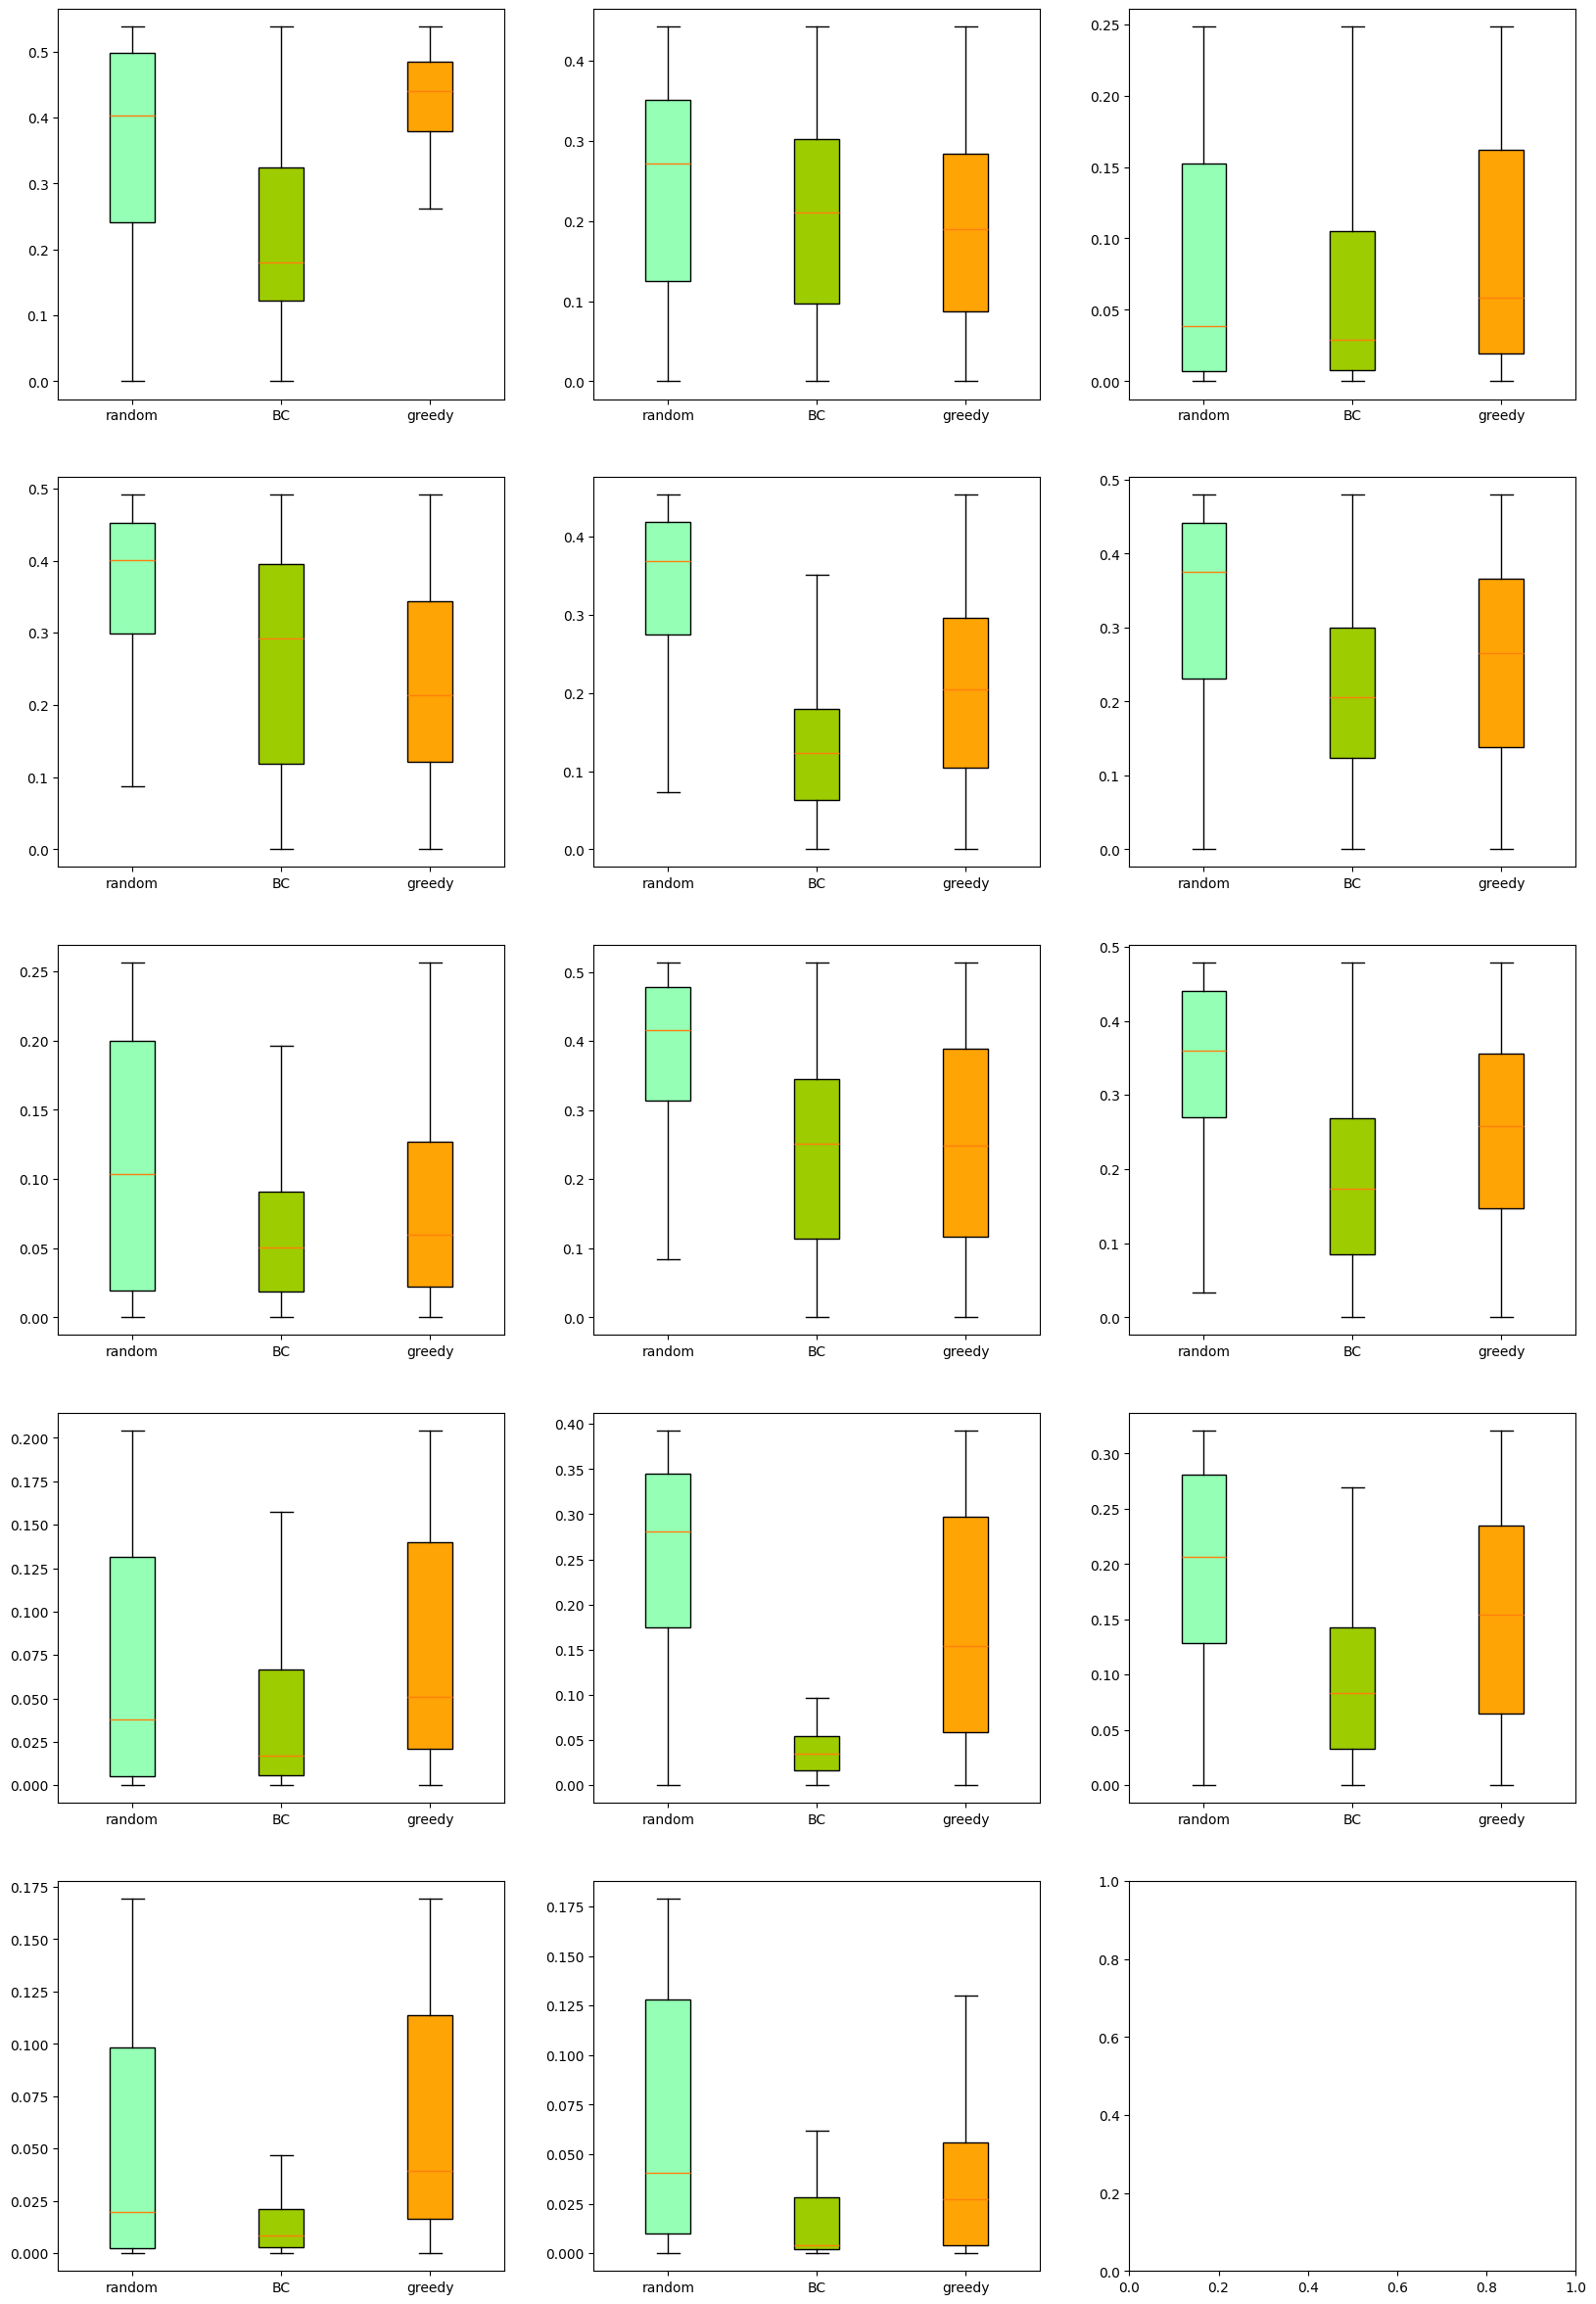

In [ ]:
eff_batch_df = pd.read_csv('../results/efficiency_edge_values.csv')
eff_batch_df = eff_batch_df.iloc[:,1:]
eff_batch_df.set_index(eff_batch_df.columns[0], inplace=True)

for index, row in eff_batch_df.iterrows():
    for col in eff_batch_df.columns:
        vars()[f"{col}_{index}"] = ast.literal_eval(row[col])


data=[
    [random_bn_macaque_rhesus_brain_2, BC_bn_macaque_rhesus_brain_2, greedy_bn_macaque_rhesus_brain_2],
    [random_word_adjacencies, BC_word_adjacencies, greedy_word_adjacencies],
    [random_circuits_s208, BC_circuits_s208, greedy_circuits_s208],
    [random_bn_cat_mixed_species_brain_1, BC_bn_cat_mixed_species_brain_1, greedy_bn_cat_mixed_species_brain_1],
    [random_facebook_414, BC_facebook_414, greedy_facebook_414],
    [random_facebook_686, BC_facebook_686, greedy_facebook_686],
    [random_polbooks, BC_polbooks, greedy_polbooks],
    [random_jazz, BC_jazz, greedy_jazz],
    [random_facebook_348, BC_facebook_348, greedy_facebook_348],
    [random_circuits_s420, BC_circuits_s420, greedy_circuits_s420],
    [random_corruption, BC_corruption, greedy_corruption],
    [random_facebook_0, BC_facebook_0, greedy_facebook_0],
    [random_circuits_s838, BC_circuits_s838, greedy_circuits_s838],
    [random_crime_net, BC_crime_net, greedy_crime_net]
]


# fig, axs = plt.subplots(5, 3, figsize=(20, 30))

fig, axs = plt.subplots(5, 3, figsize=(20, 30))

for i in range(5):
    for j in range(3):
        plt.sca(axs[i, j])  
        box = plt.boxplot(data[i*3 + j], labels=['random', 'BC', 'greedy'], showfliers=False, patch_artist=True)
        
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)

plt.tight_layout() 
plt.show()

## R plots

### targeted scatter plot

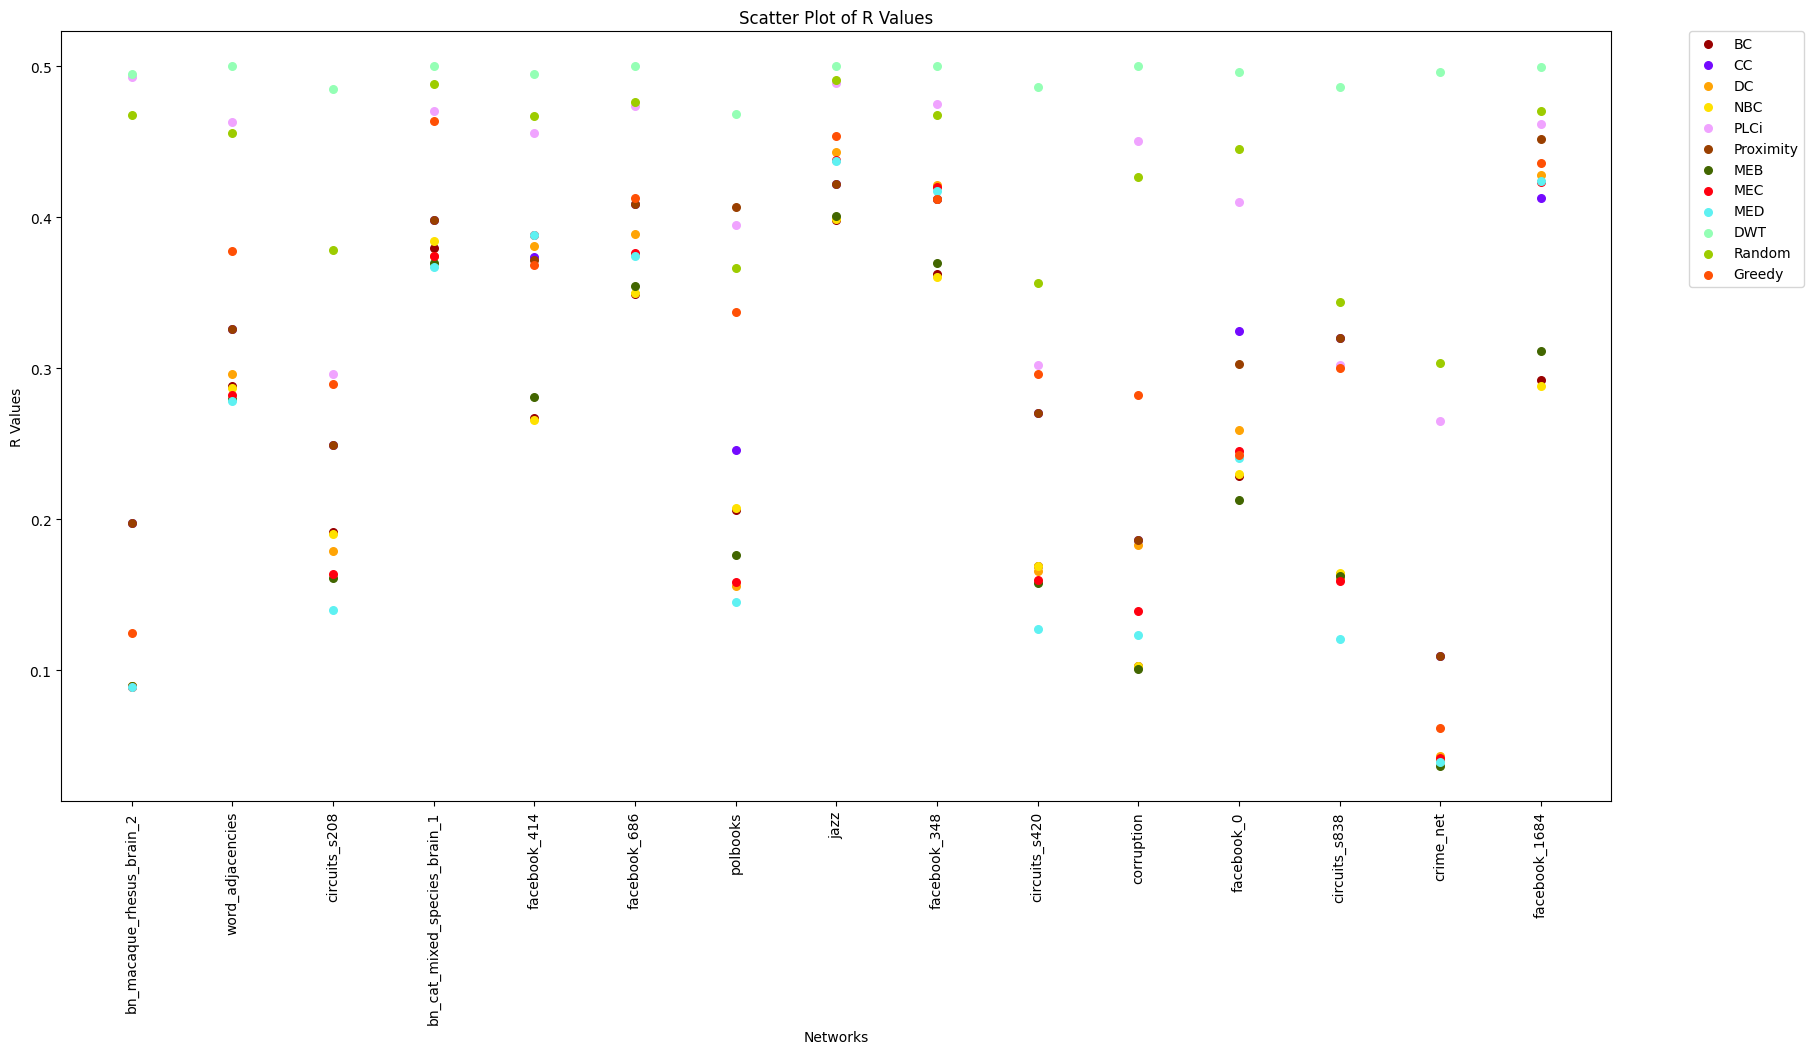

In [ ]:
df = pd.read_csv(r"../results/R_values.csv")

facebook_1684_R= df.iloc[-1]
facebook_1684_R_list=facebook_1684_R.tolist()[2:]

crimeNet_R= df.iloc[-2]
crimeNet_R_list=crimeNet_R.tolist()[2:]

import matplotlib.pyplot as plt
import random

#these are the column names: network	BC	CC	DC	NBC	PLCi Proximity MEB	MEC	MED	DWT

plt.figure(figsize=(20,10))

# colors=["#8390FA","#826AED","#C879FF","#FFB7FF","#9DD6FD","#3BF4FB","#9AFBB0","#CAFF8A","#374892","#FFFF00","#5060B5","#1D2F6F", "salmon"]
colors = ["#94FFB5", "#9DCC00", "#FFA405", "#FF0010", "#5EF1F2", "#00998F", "#740AFF", "#990000", "#426600", "#FFE100", "#FF5005", "#993F00", "#F0A3FF"]
#shuffle it

random.seed(42)
random.shuffle(colors)

plt.scatter(df['network'], df['BC'], label='BC', color=colors[0], marker='.', s=120)
plt.scatter(df['network'], df['CC'], label='CC', color=colors[1], marker='.', s=120)
plt.scatter(df['network'], df['DC'], label='DC', color=colors[2], marker='.', s=120)
plt.scatter(df['network'], df['NBC'], label='NBC', color=colors[3], marker='.', s=120)
plt.scatter(df['network'], df['PLCi'], label='PLCi', color=colors[4], marker='.', s=120)
plt.scatter(df['network'], df['PR'], label='Proximity', color=colors[6], marker='.', s=120)
plt.scatter(df['network'], df['MEB'], label='MEB', color=colors[7], marker='.', s=120)
plt.scatter(df['network'], df['MEC'], label='MEC', color=colors[8], marker='.', s=120)
plt.scatter(df['network'], df['MED'], label='MED', color=colors[9], marker='.', s=120)
plt.scatter(df['network'], df['DWT'], label='DWT', color=colors[10], marker='.', s=120)
plt.scatter(df['network'], df['random'], label='Random', color=colors[11], marker='.', s=120)
plt.scatter(df['network'], df['greedy'], label='Greedy', color=colors[12], marker='.', s=120)


plt.xlabel('Networks')
plt.ylabel('R Values')
plt.title('Scatter Plot of R Values')
plt.xticks(rotation=90, ha='center')
#put legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### community scatter plot

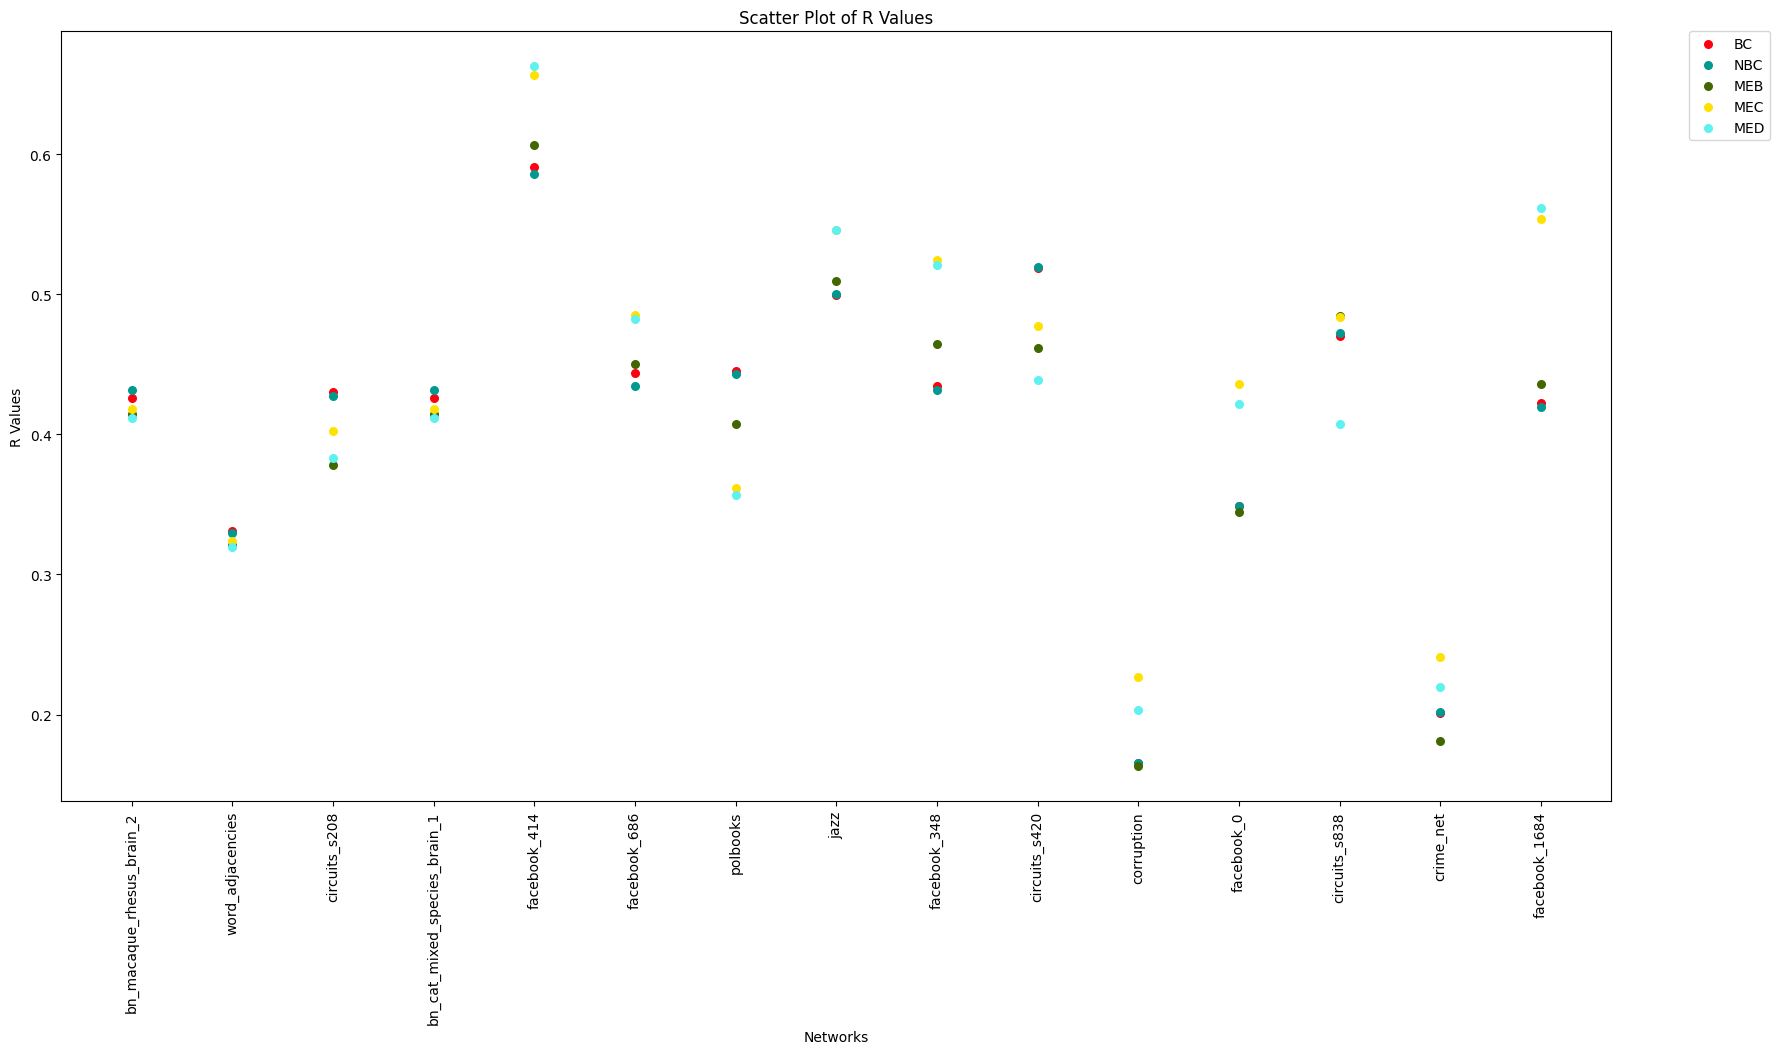

In [ ]:
#read csv into dataframe
import pandas as pd
df = pd.read_csv(r"../results/R_com_values.csv")

colors=list(colors)
colors=random.shuffle(colors)


facebook_1684_R= df.iloc[-1]
facebook_1684_R_list=facebook_1684_R.tolist()[2:]

crimeNet_R= df.iloc[-2]
crimeNet_R_list=crimeNet_R.tolist()[2:]

import matplotlib.pyplot as plt
import random

#these are the column names: network	BC	CC	DC	NBC	PLCi Proximity MEB	MEC	MED	DWT

plt.figure(figsize=(20,10))

# colors=["#8390FA","#826AED","#C879FF","#FFB7FF","#9DD6FD","#3BF4FB","#9AFBB0","#CAFF8A","#374892","#FFFF00","#5060B5","#1D2F6F", "salmon"]
colors = ["#94FFB5", "#9DCC00", "#FFA405", "#FF0010", "#5EF1F2", "#00998F", "#740AFF", "#990000", "#426600", "#FFE100", "#FF5005", "#993F00", "#F0A3FF"]
#shuffle it

random.seed(31)
random.shuffle(colors)

plt.scatter(df['network'], df['BC'], label='BC', color=colors[0], marker='.', s=120)
plt.scatter(df['network'], df['NBC'], label='NBC', color=colors[1], marker='.', s=120)
plt.scatter(df['network'], df['MEB'], label='MEB', color=colors[2], marker='.', s=120)
plt.scatter(df['network'], df['MEC'], label='MEC', color=colors[3], marker='.', s=120)
plt.scatter(df['network'], df['MED'], label='MED', color=colors[4], marker='.', s=120)


plt.xlabel('Networks')
plt.ylabel('R Values')
plt.title('Scatter Plot of R Values')
plt.xticks(rotation=90, ha='center')
#put legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## InterE

### targeted

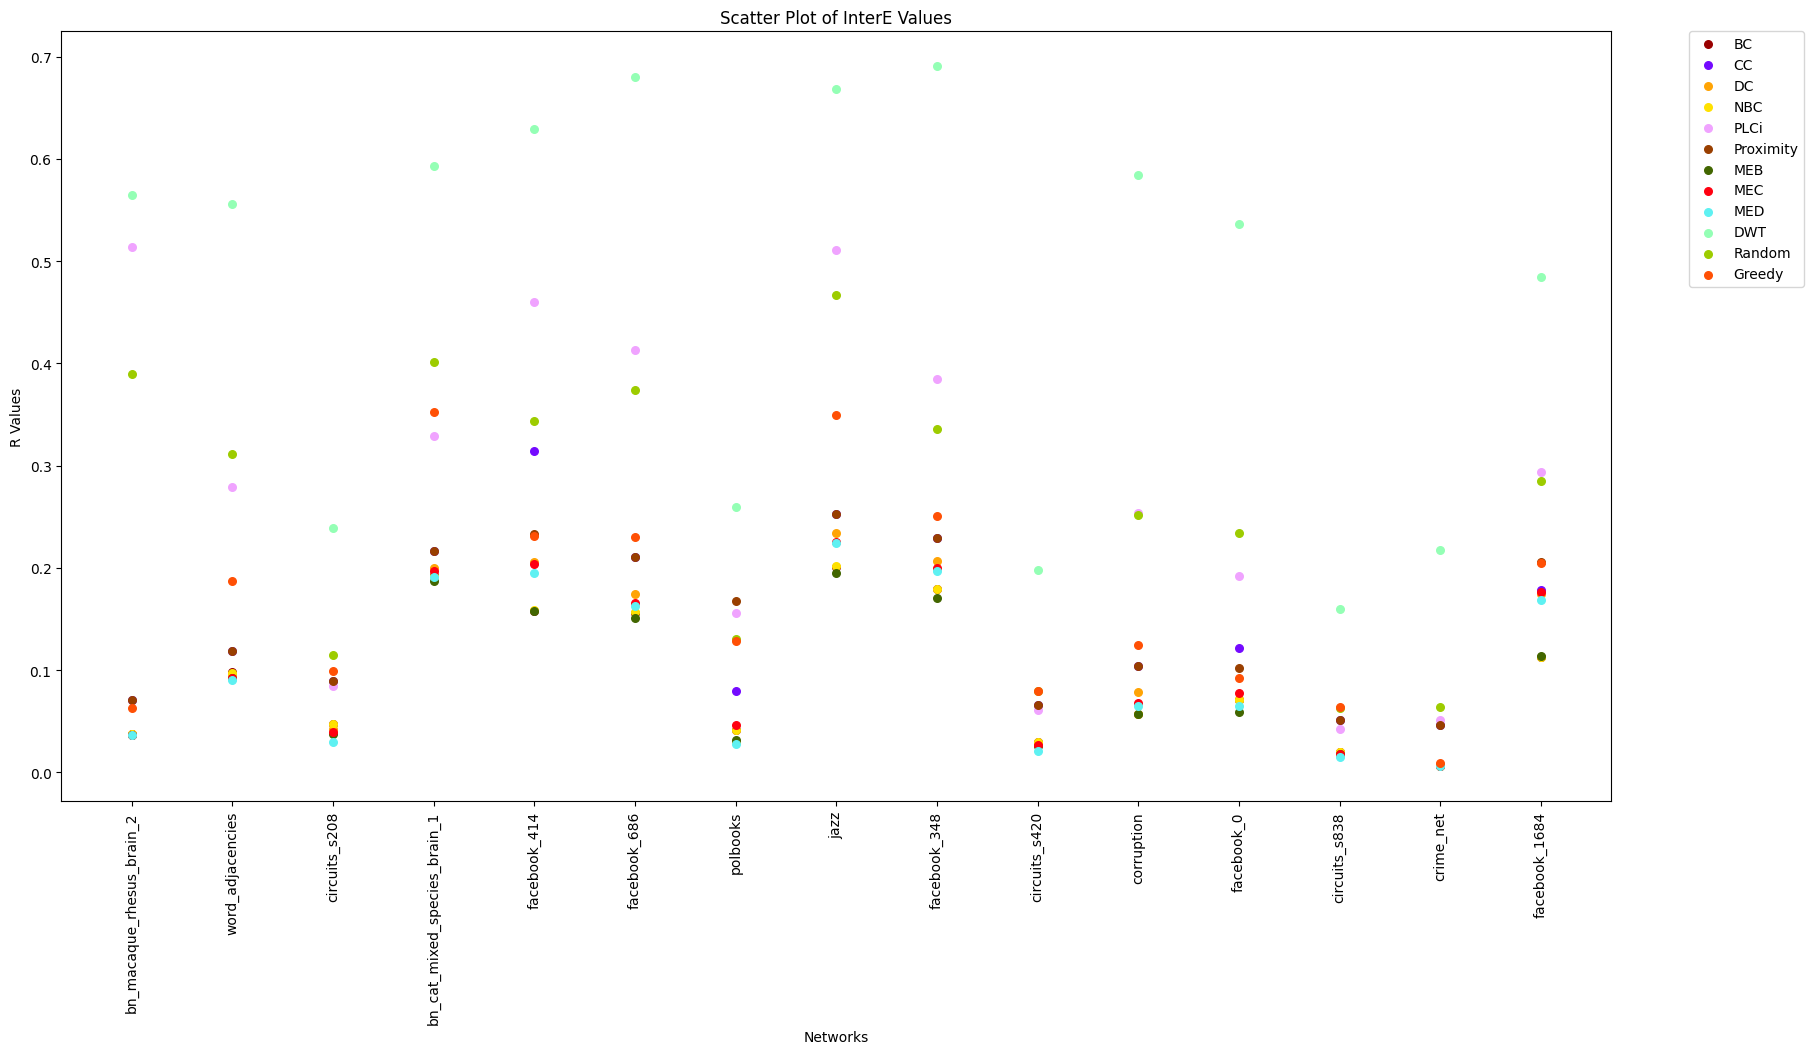

In [ ]:
import pandas as pd
df = pd.read_csv(r"../results/InterE_values.csv")
df

facebook_1684_R= df.iloc[-1]
facebook_1684_R_list=facebook_1684_R.tolist()[2:]

crimeNet_R= df.iloc[-2]
crimeNet_R_list=crimeNet_R.tolist()[2:]

import matplotlib.pyplot as plt
import random

#these are the column names: network	BC	CC	DC	NBC	PLCi Proximity MEB	MEC	MED	DWT

plt.figure(figsize=(20,10))

# colors=["#8390FA","#826AED","#C879FF","#FFB7FF","#9DD6FD","#3BF4FB","#9AFBB0","#CAFF8A","#374892","#FFFF00","#5060B5","#1D2F6F", "salmon"]
colors = ["#94FFB5", "#9DCC00", "#FFA405", "#FF0010", "#5EF1F2", "#00998F", "#740AFF", "#990000", "#426600", "#FFE100", "#FF5005", "#993F00", "#F0A3FF"]
#shuffle it

random.seed(42)
random.shuffle(colors)

plt.scatter(df['network'], df['BC'], label='BC', color=colors[0], marker='.', s=120)
plt.scatter(df['network'], df['CC'], label='CC', color=colors[1], marker='.', s=120)
plt.scatter(df['network'], df['DC'], label='DC', color=colors[2], marker='.', s=120)
plt.scatter(df['network'], df['NBC'], label='NBC', color=colors[3], marker='.', s=120)
plt.scatter(df['network'], df['PLCi'], label='PLCi', color=colors[4], marker='.', s=120)
plt.scatter(df['network'], df['PR'], label='Proximity', color=colors[6], marker='.', s=120)
plt.scatter(df['network'], df['MEB'], label='MEB', color=colors[7], marker='.', s=120)
plt.scatter(df['network'], df['MEC'], label='MEC', color=colors[8], marker='.', s=120)
plt.scatter(df['network'], df['MED'], label='MED', color=colors[9], marker='.', s=120)
plt.scatter(df['network'], df['DWT'], label='DWT', color=colors[10], marker='.', s=120)
plt.scatter(df['network'], df['random'], label='Random', color=colors[11], marker='.', s=120)
plt.scatter(df['network'], df['greedy'], label='Greedy', color=colors[12], marker='.', s=120)


plt.xlabel('Networks')
plt.ylabel('R Values')
plt.title('Scatter Plot of InterE Values')
plt.xticks(rotation=90, ha='center')
#put legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### community scatter plot

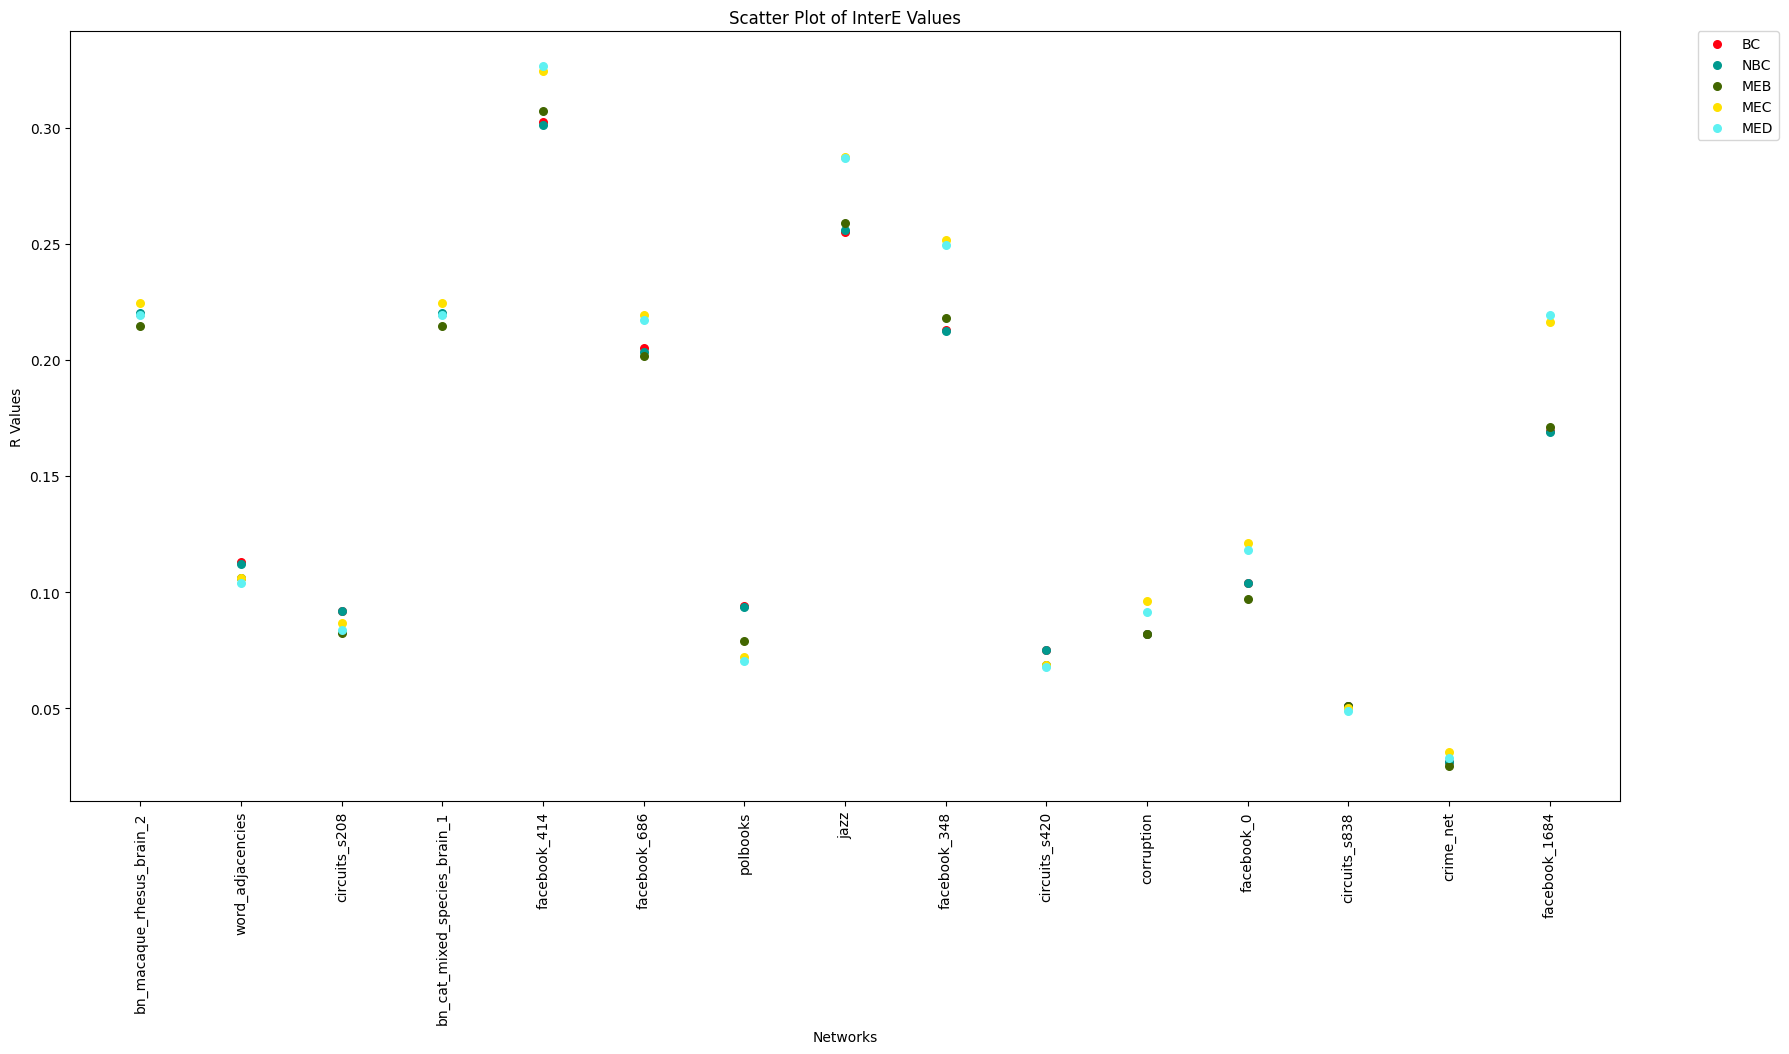

In [ ]:
#read csv into dataframe
import pandas as pd
df = pd.read_csv(r"../results/InterE_com_values.csv")

colors=list(colors)
colors=random.shuffle(colors)


facebook_1684_R= df.iloc[-1]
facebook_1684_R_list=facebook_1684_R.tolist()[2:]

crimeNet_R= df.iloc[-2]
crimeNet_R_list=crimeNet_R.tolist()[2:]

import matplotlib.pyplot as plt
import random

#these are the column names: network	BC	CC	DC	NBC	PLCi Proximity MEB	MEC	MED	DWT

plt.figure(figsize=(20,10))

# colors=["#8390FA","#826AED","#C879FF","#FFB7FF","#9DD6FD","#3BF4FB","#9AFBB0","#CAFF8A","#374892","#FFFF00","#5060B5","#1D2F6F", "salmon"]
colors = ["#94FFB5", "#9DCC00", "#FFA405", "#FF0010", "#5EF1F2", "#00998F", "#740AFF", "#990000", "#426600", "#FFE100", "#FF5005", "#993F00", "#F0A3FF"]
#shuffle it

random.seed(31)
random.shuffle(colors)

plt.scatter(df['network'], df['BC'], label='BC', color=colors[0], marker='.', s=120)
plt.scatter(df['network'], df['NBC'], label='NBC', color=colors[1], marker='.', s=120)
plt.scatter(df['network'], df['MEB'], label='MEB', color=colors[2], marker='.', s=120)
plt.scatter(df['network'], df['MEC'], label='MEC', color=colors[3], marker='.', s=120)
plt.scatter(df['network'], df['MED'], label='MED', color=colors[4], marker='.', s=120)


plt.xlabel('Networks')
plt.ylabel('R Values')
plt.title('Scatter Plot of InterE Values')
plt.xticks(rotation=90, ha='center')
#put legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Graphs visualization

These are the communities for the graphs we saved

In [ ]:
bn_cat_mized_species_brain_1_communities = [{0,  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  13,  14,  16,  17,  18,  22,  26,  27,  30,  31,  32,  33,  34,  36,  37,  52,  53,  71,  84,  85,  105}, {24,  35,  38,  39,  63,  64,  73,  74,  75,  76,  78,  79,  80,  81,  82,  83,  86,  124,  128}, {19,  20,  21,  23,  29,  41,  54,  56,  57,  58,  59,  62,  65,  66,  67,  68,  69,  70,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  100,  101,  103,  104,  106,  107,  108}, {15,  25,  28,  40,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  55,  60,  61,  72,  77,  99,  102,  109,  110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,  122,  123,  125,  126,  127,  129}]

bn_macaque_rhesus_brain_2 = [{0, 2, 4, 16, 29, 31, 35, 41, 43, 46, 47, 51, 54, 63, 67, 76, 87, 94}, {3,  6,  9,  15,  17,  19,  22,  24,  34,  36,  44,  48,  52,  53,  55,  56,  57,  58,  59,  62,  66,  68,  70,  77,  79,  85,  92}, {5,  7,  10,  11,  12,  18,  23,  27,  33,  42,  49,  50,  60,  61,  64,  69,  71,  72,  74,  75,  81,  82,  83,  84,  86,  88,  89,  90,  91,  93,  95,  96,  97,  98,  99,  100,  101}, {1,  8,  13,  14,  20,  21,  25,  26,  28,  30,  32,  37,  38,  39,  40,  45,  65,  73,  78,  80}]

circuits_s420_communities = [{4,  5,  6,  7,  35,  36,  37,  38,  39,  40,  82,  83,  84,  85,  87,  88,  110,  111,  112,  113,  114,  115,  116,  117,  144,  145,  146,  147,  191,  192,  193,  194,  195,  224,  225,  232,  244,  248}, {0,  1,  2,  3,  32,  33,  34,  41,  42,  43,  44,  86,  142,  143,  165,  198,  211,  212,  213,  240}, {12, 13, 14, 15, 48, 49, 50, 51, 52, 53, 150, 151, 152, 153}, {8, 9, 10, 11, 45, 46, 47, 54, 55, 56, 57, 148, 149, 166, 214, 215, 216, 241}, {20, 21, 22, 23, 61, 62, 63, 64, 65, 66, 156, 157, 158, 159}, {16,  17,  18,  19,  58,  59,  60,  67,  68,  69,  70,  100,  154,  155,  167,  184,  217,  218,  219,  242}, {30, 31, 74, 75, 76, 162, 163}, {96,  97,  98,  99,  101,  102,  126,  127,  128,  129,  130,  131,  132,  133,  169,  170,  179,  180,  181,  182,  201,  202,  228,  229,  236,  246,  250}, {103,  104,  105,  106,  108,  109,  134,  135,  136,  137,  138,  139,  140,  141,  171,  172,  183,  185,  186,  187,  188,  189,  205,  206,  207,  208,  209,  210,  230,  231,  237,  238,  239,  247,  251}, {24,  25,  26,  27,  28,  29,  71,  72,  73,  77,  78,  79,  80,  81,  107,  160,  161,  164,  190,  220,  221,  222,  223,  243}, {89,  90,  91,  92,  93,  94,  95,  118,  119,  120,  121,  122,  123,  124,  125,  168,  173,  174,  175,  176,  177,  178,  196,  197,  199,  200,  203,  204,  226,  227,  233,  234,  235,  245,  249}]

corruption_communities=[{0, 130, 258, 264, 17, 282, 158, 288, 39, 300, 45, 46, 302, 174, 308, 184, 189, 69, 198, 74, 83, 214, 87, 220, 93, 225, 97, 98, 229, 105, 233, 107, 112, 114, 248, 252, 127}, {129, 2, 3, 262, 140, 14, 15, 20, 148, 22, 23, 26, 283, 284, 157, 162, 294, 167, 171, 173, 305, 63, 70, 72, 200, 211, 85, 219, 230, 108, 240, 120, 122, 124}, {226, 185, 266, 299, 238, 304, 53, 279, 152, 89, 88, 151}, {128, 256, 132, 260, 6, 134, 7, 263, 261, 11, 16, 19, 276, 277, 278, 21, 275, 147, 149, 155, 27, 156, 286, 159, 160, 163, 38, 169, 298, 177, 306, 52, 54, 57, 186, 187, 60, 64, 197, 71, 73, 80, 81, 209, 216, 102, 234, 239, 113, 242, 246, 123}, {65, 195, 8, 9, 268, 270, 207, 272, 153, 154, 91, 28, 285, 90, 32, 36, 228, 51, 180, 243, 118, 115, 116, 249}, {1, 4, 5, 10, 139, 18, 30, 287, 31, 37, 166, 42, 170, 172, 182, 204, 205, 210, 212, 84, 218, 92, 96, 100, 232, 236, 237, 244, 245, 247, 250, 253}, {131, 265, 137, 138, 271, 144, 145, 274, 24, 281, 25, 280, 29, 165, 293, 40, 41, 44, 176, 50, 181, 55, 56, 190, 62, 194, 199, 201, 75, 206, 79, 82, 213, 215, 227, 109, 241, 117, 125, 254}, {135, 136, 141, 86, 221, 224, 33, 34, 99, 290, 101, 106, 301, 110, 178, 307, 179, 119, 251, 188}, {291, 133, 48, 273, 208, 49, 222, 223}, {193, 164, 104, 267, 235, 269, 58, 59}, {66, 67, 202, 203, 76, 111, 175, 255}, {257, 196, 68, 12, 77, 78, 13, 146, 150, 217, 289, 35, 103, 43, 303, 47, 121, 126}, {161, 292, 231, 183, 61, 94, 95}, {192, 259, 295, 296, 297, 168, 142, 143, 191}]



In [ ]:

partition = corruption_communities
G0= nx.read_gml('../graphs/nodes/corruption/0.gml'); G1= nx.read_gml("../graphs/nodes/corruption/1.gml"); G2=nx.read_gml("../graphs/nodes/corruption/2.gml"); G3=nx.read_gml("../graphs/nodes/corruption/3.gml"); G4=nx.read_gml("../graphs/nodes/corruption/4.gml"); G5=nx.read_gml("../graphs/nodes/corruption/5.gml"); G6=nx.read_gml("../graphs/nodes/corruption/6.gml"); G7=nx.read_gml("../graphs/nodes/corruption/7.gml"); G8=nx.read_gml("../graphs/nodes/corruption/8.gml"); G9=nx.read_gml("../graphs/nodes/corruption/9.gml")
nx.community.modularity(corruption, partition)

0.694859275384277

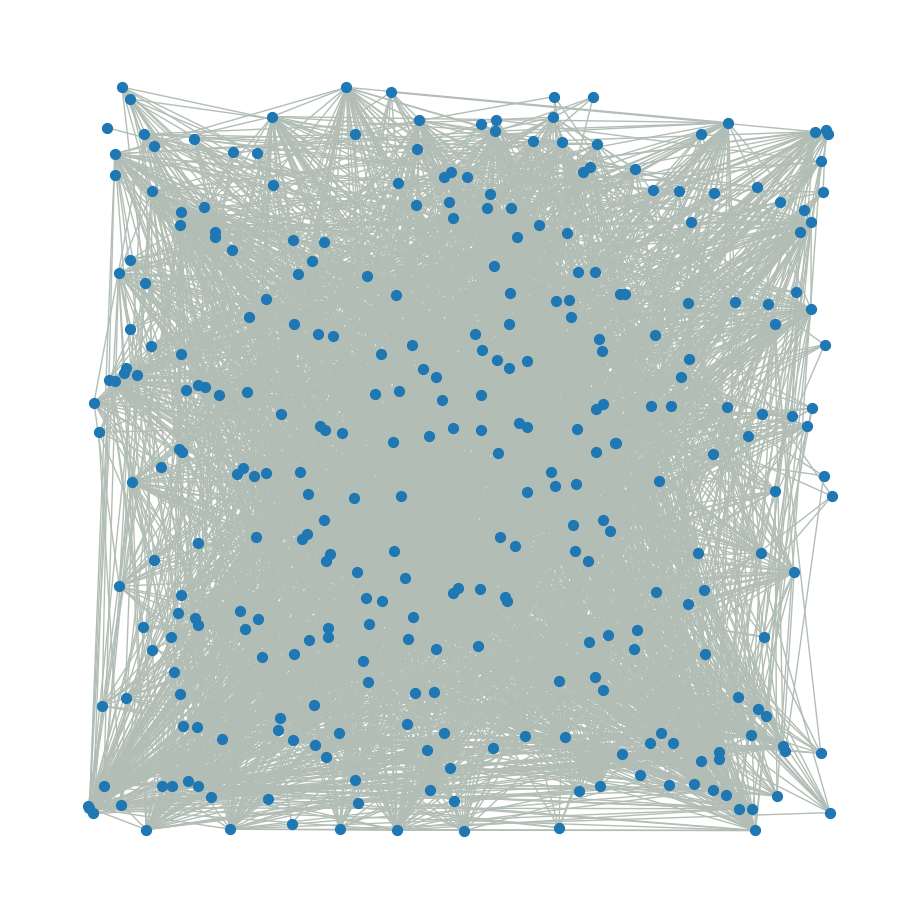

In [ ]:
t=(20,20)
figure = plt.figure(figsize=(9,9))
layout = nx.spring_layout(G, seed=42)

colors = ["#94FFB5", "#9DCC00", "#FFA405", "#FF0010", "#5EF1F2", "#00998F", "#740AFF", "#990000", "#426600", "#FFE100", "#FF5005", "#993F00", "#F0A3FF", "#FF00FF", "#00FFFF", "#FF0000", "#0000FF", "#FFFF00", "#00FF00", "#800000", "#808000", "#008000", "#800080", "#008080", "#000080", "#808080", "#C0C0C0", "#FF00FF", "#800080", "#800000", "#008080", "#000080", "#808080", "#C0C0C0", "#FF00FF", "#800080", "#800000", "#008080", "#000080", "#808080", "#C0C0C0", "#FF00FF", "#800080", "#800000", "#008080", "#000080", "#808080", "#C0C0C0", "#FF00FF", "#800080", "#800000", "#008080", "#000080", "#808080", "#C0C0C0", "#FF00FF", "#800080", "#800000", "#008080", "#000080", "#808080", "#C0C0C0", "#FF00FF", "#800080", "#800000", "#008080", "#000080", "#808080", "#C0C0C0", "#FF00FF", "#800080", "#800000", "#008080", "#000080", "#808080", "#C0C0C0", "#FF00FF", "#800080", "#800000", "#008080", "#000080", "#808080", "#C0C0C0", "#FF00FF", "#800080", "#800000", "#008080", "#000080", "#808080", "#C0C0C0"]

nx.draw(G0, node_size=50, with_labels=False, pos=nx.random_layout(G0), edge_color='#B2BEB5')

# for i in range(len(partition)):
#     string_partition = [str(node) for node in partition[i]]
#     nx.draw_networkx_nodes(G0, layout, nodelist=string_partition, node_size=50, node_color=colors[i])



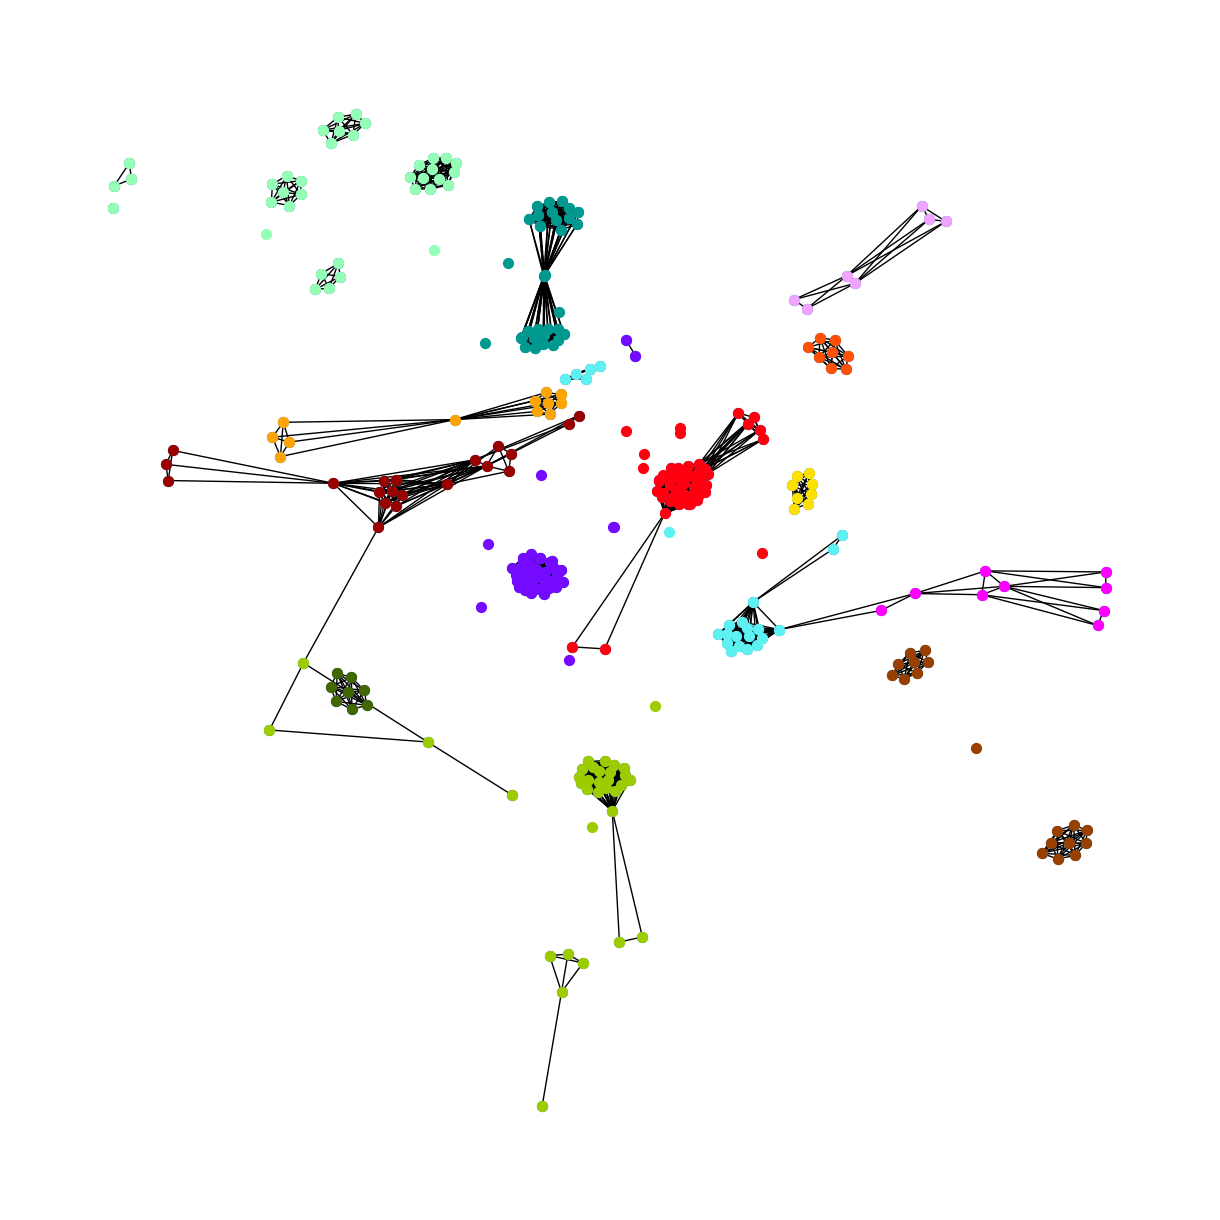

In [ ]:
figure = plt.figure(figsize=(12,12))
nx.draw(G1, layout, node_size=50, with_labels=False)
for  i in range(len(partition)):
    string_partition = [str(node) for node in partition[i]]
    nx.draw_networkx_nodes(G1, layout, nodelist=string_partition, node_size=50, node_color=colors[i])



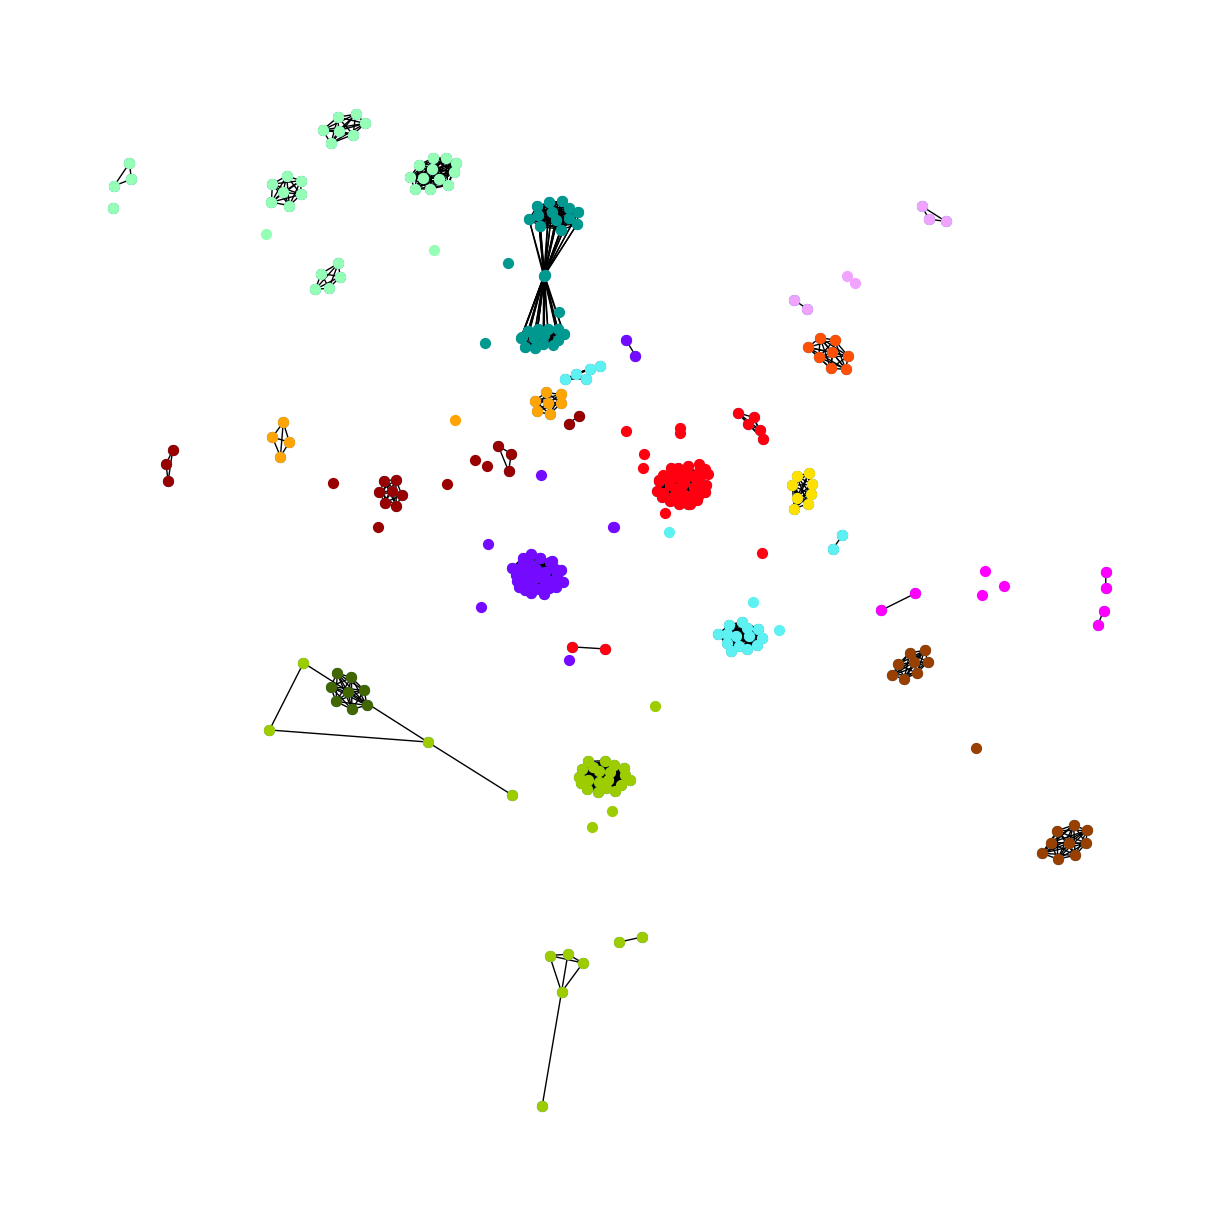

In [ ]:
figure = plt.figure(figsize=(12,12))
nx.draw(G2, layout, node_size=50, with_labels=False)
for  i in range(len(partition)):
    string_partition = [str(node) for node in partition[i]]
    nx.draw_networkx_nodes(G2, layout, nodelist=string_partition, node_size=50, node_color=colors[i])


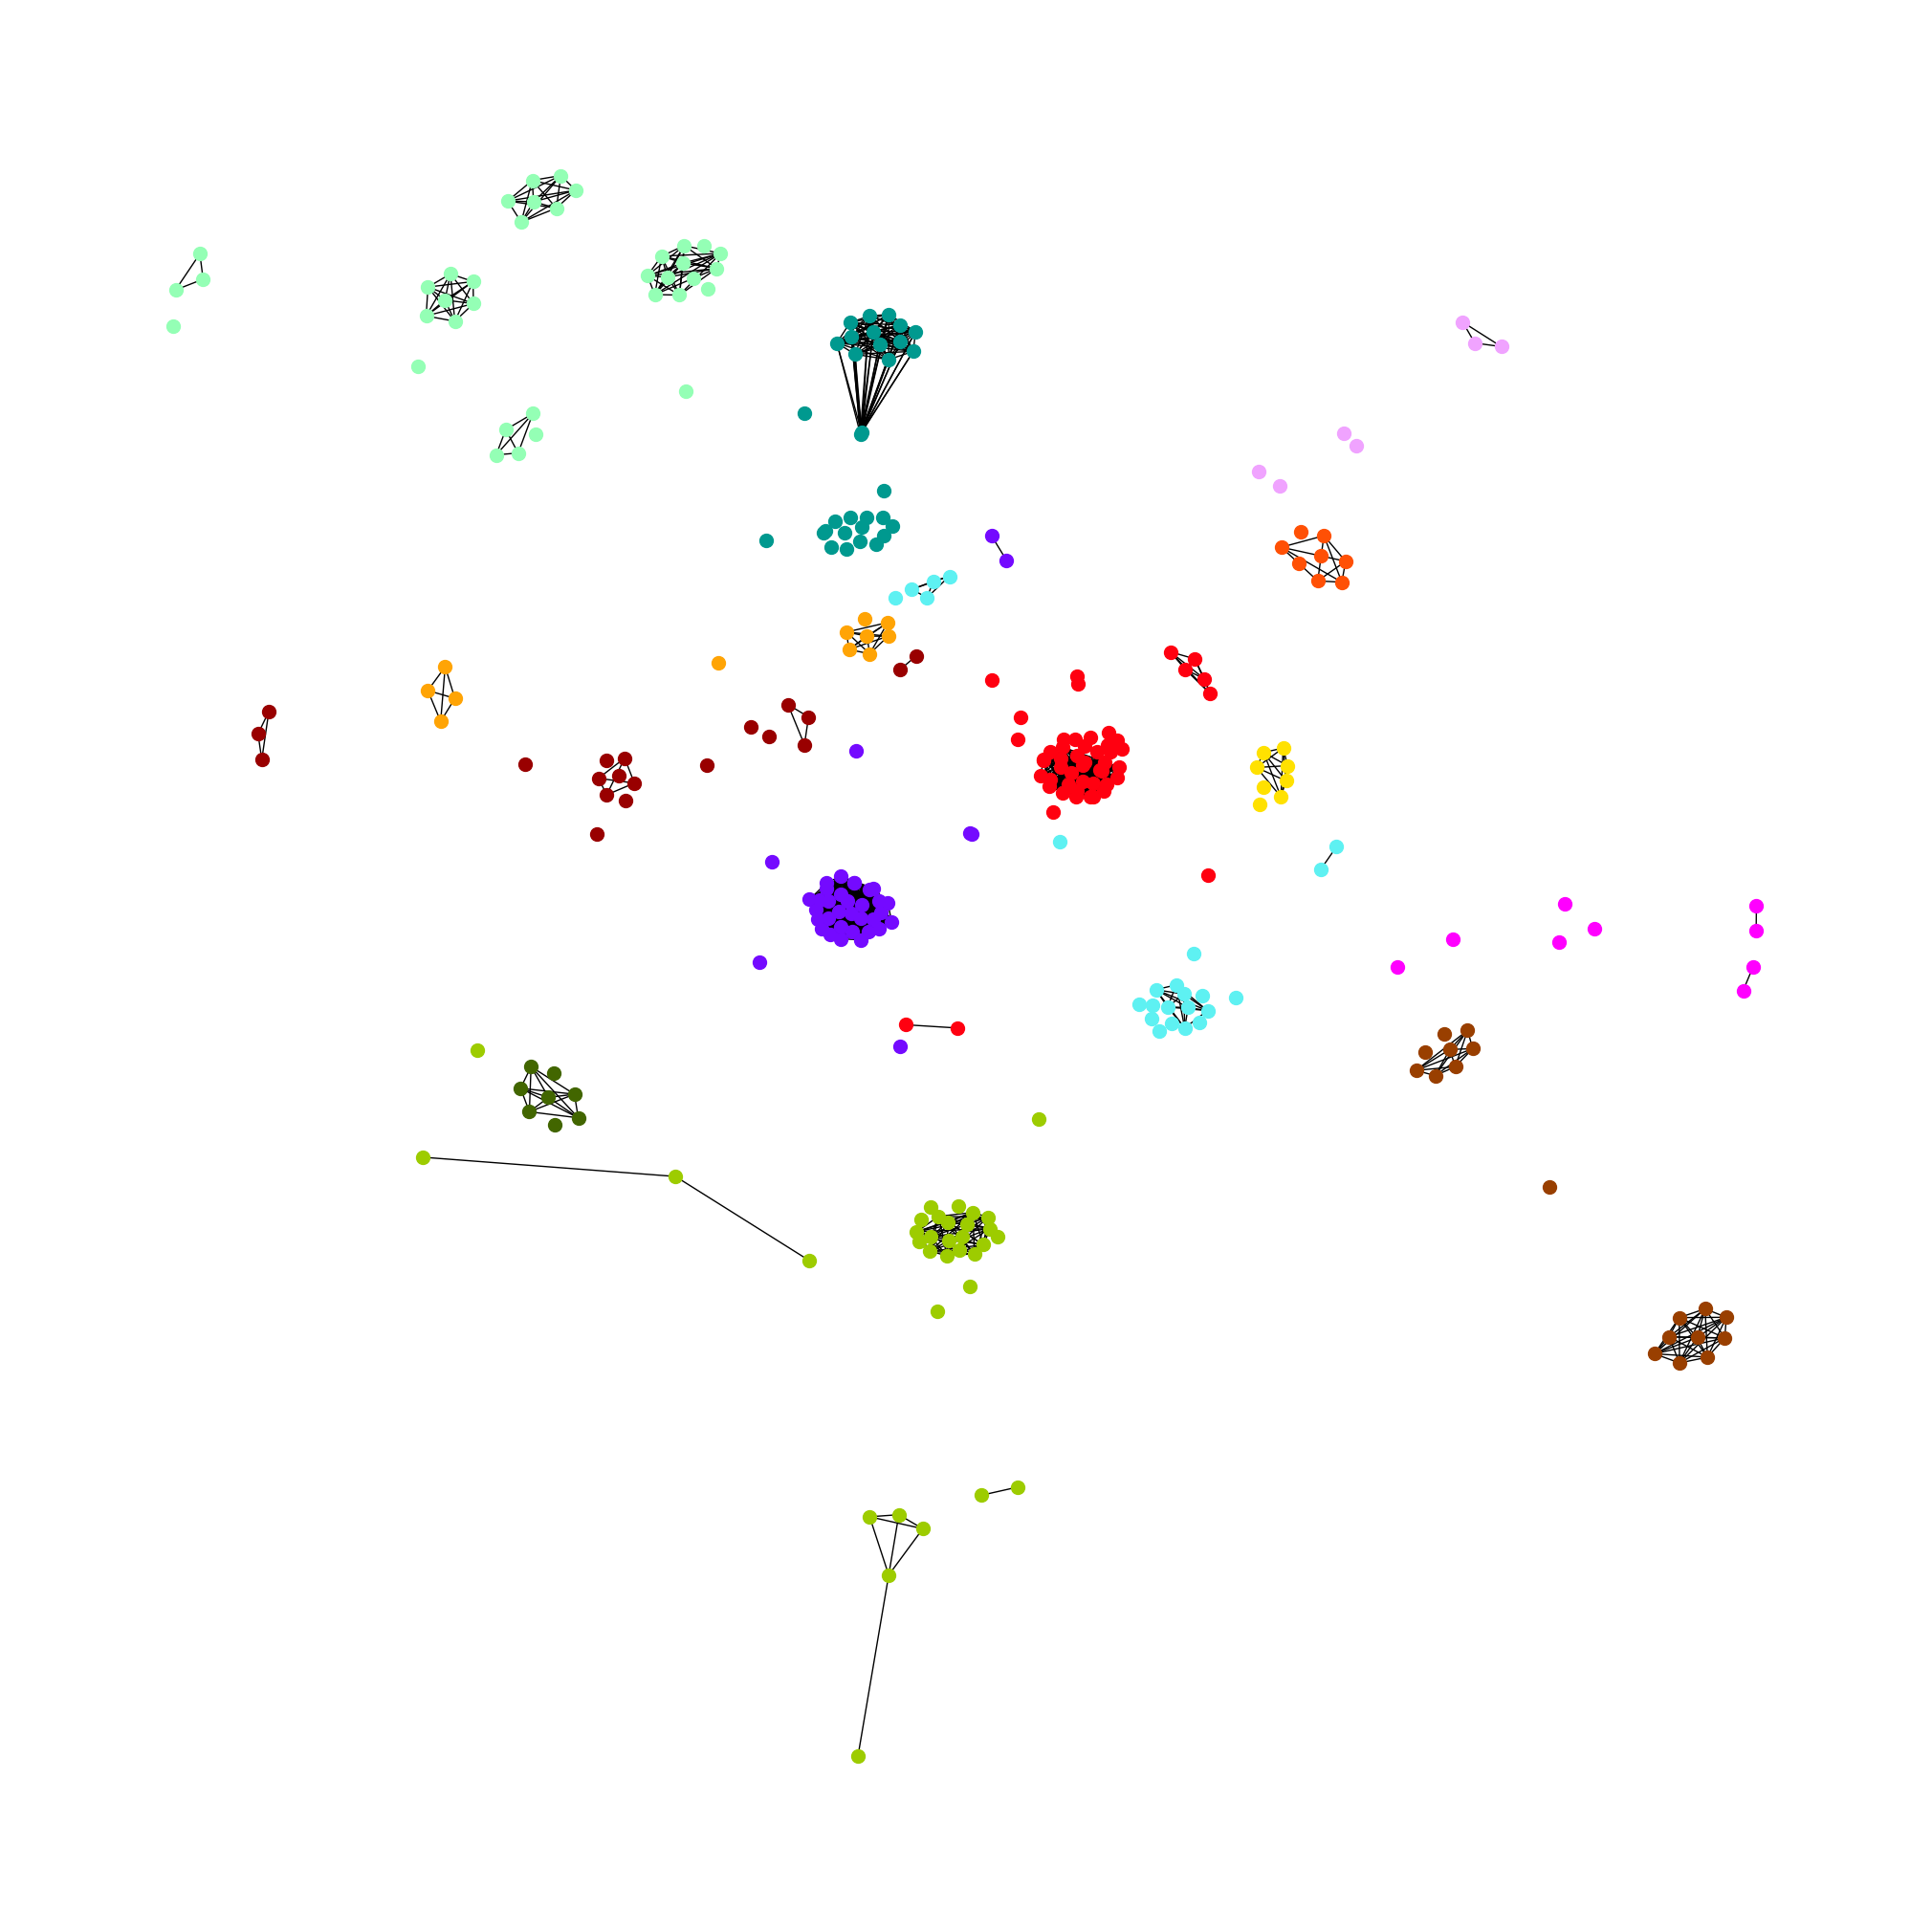

In [ ]:
figure = plt.figure(figsize=(20,20))

nx.draw(G5, layout, node_size=50, with_labels=False)
for  i in range(len(partition)):
    string_partition = [str(node) for node in partition[i]]
    nx.draw_networkx_nodes(G5, layout, nodelist=string_partition, node_size=100, node_color=colors[i])

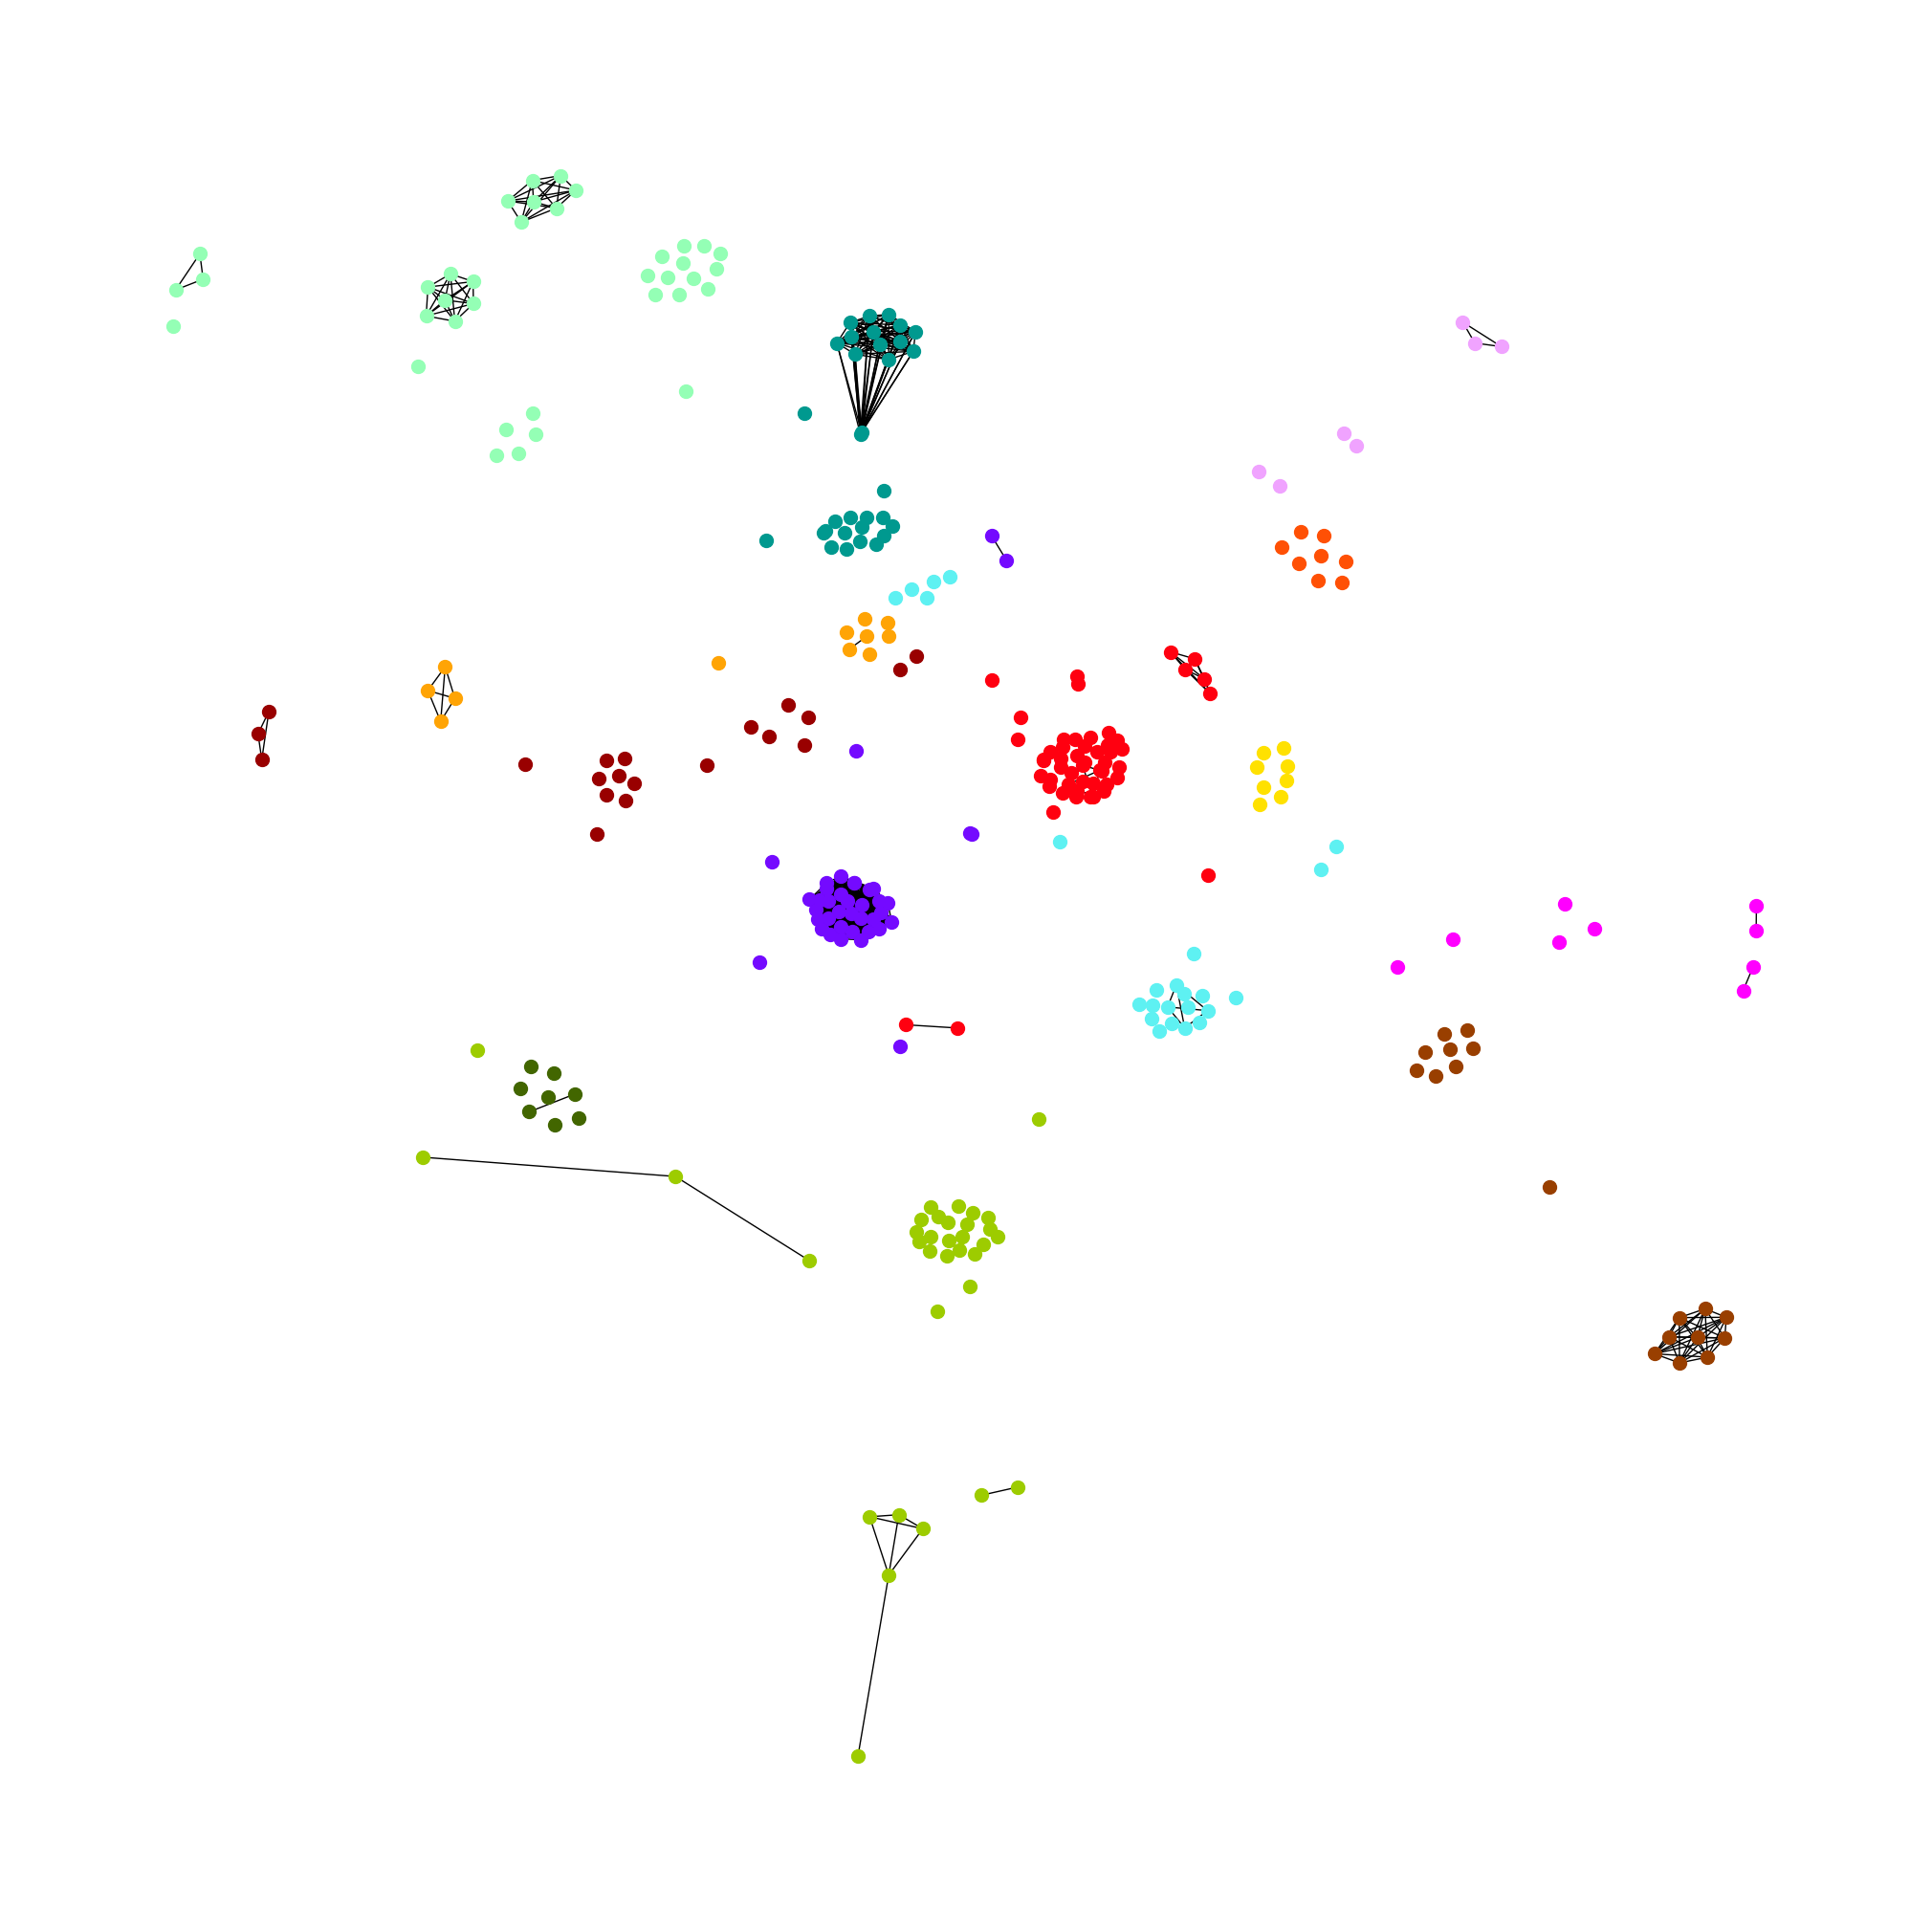

In [ ]:
figure = plt.figure(figsize=(20,20))
nx.draw(G9, layout, node_size=50, with_labels=False)
for  i in range(len(partition)):
    string_partition = [str(node) for node in partition[i]]
    nx.draw_networkx_nodes(G9, layout, nodelist=string_partition, node_size=100, node_color=colors[i])

## Statistical analysis

### ranks

In [ ]:
centralities = {
    'MED': [6, 2, 3, 2, 1, 1, 0,0,0,0,0,0],
    'MEB': [3, 5, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    'NBC': [3, 2, 2, 1, 3, 4, 0, 0, 0, 0, 0, 0],
    'BC': [2, 5, 1, 5, 2, 0, 0, 0, 0, 0, 0 ,0],
    'MEC': [1, 1, 4, 2, 1, 1, 1, 1, 0, 0, 0, 0]
}

ranks = range(1, 13)
centralities_list = list(centralities.keys())

# Convert data to a matrix format
data_matrix = np.array([centralities[centrality] for centrality in centralities_list])

plt.figure(figsize=(10, 6))
plt.imshow(data_matrix, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Count of Centrality')
plt.xticks(np.arange(len(ranks)), ranks)
plt.yticks(np.arange(len(centralities_list)), centralities_list)
plt.xlabel('R Ranks')
plt.ylabel('Centralities')
plt.title('Distribution of Centralities Across Ranks')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

centralities = {
    'MED': [6,3,0,6,0,0,0,0,0,0,0,0,0,0,0],
    'MEB': [6,5,3,0,0,0,0,0,0,0,0,0,0,0,0],
    'NBC': [1,1,5,3,2,0,0,0,0,0,0,0,0,0,0],
    'BC': [1,4,2,2,3,0,0,0,0,0,0,0,0,0,0],
    'MEC': [1,1,4,6,3,0,0,0,0,0,0,0,0,0,0]
}

ranks = range(1, 13)
centralities_list = list(centralities.keys())

# Convert data to a matrix format
data_matrix = np.array([centralities[centrality] for centrality in centralities_list])

plt.figure(figsize=(10, 6))
plt.imshow(data_matrix, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Count of Centrality')
plt.xticks(np.arange(len(ranks)), ranks)
plt.yticks(np.arange(len(centralities_list)), centralities_list)
plt.xlabel('InterE Ranks')
plt.ylabel('Centralities')
plt.title('Distribution of Centralities Across Ranks')
plt.show()

### MAnn-Whitney U test

In [ ]:
from scipy.stats import mannwhitneyu

centralities_R= {
    'MED': [6, 2, 3, 2, 1, 1, 0,0,0,0,0,0],
    'MEB': [3, 5, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    'NBC': [3, 2, 2, 1, 3, 4, 0, 0, 0, 0, 0, 0],
    'BC': [2, 5, 1, 5, 2, 0, 0, 0, 0, 0, 0 ,0],
    'MEC': [1, 1, 4, 2, 1, 1, 1, 1, 0, 0, 0, 0]
}

centralities_InterE= {
    'MED': [6,3,0,6,0,0,0,0,0,0,0,0,0,0,0],
    'MEB': [6,5,3,0,0,0,0,0,0,0,0,0,0,0,0],
    'NBC': [1,1,5,3,2,0,0,0,0,0,0,0,0,0,0],
    'BC': [1,4,2,2,3,0,0,0,0,0,0,0,0,0,0],
    'MEC': [1,1,4,6,3,0,0,0,0,0,0,0,0,0,0]
}

# Loop through all centralities
for centrality in centralities_list:
    # Get data for the current centrality from 'R' and 'InterE'
    data_R = centralities_R[centrality]
    data_InterE = centralities_InterE[centrality]
    
    # Perform Mann-Whitney U Test
    statistic, p_value = mannwhitneyu(data_R, data_InterE)

    # Interpret and print the results
    alpha = 0.05  # Set your significance level
    if p_value < alpha:
        print(f"There is a statistically significant difference between {centrality} for R and InterE.")
        print(f"P-value: {p_value}\n")
    else:
        print(f"No significant difference between {centrality} for R and InterE.")
        print(f"P-value: {p_value}\n")